In [3]:
#importing the necessary packages
import pandas as pd
import string
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
%matplotlib inline

# Business Problem
To ensure there is no discrimination between employees, it is imperative for the Human Resources department of Delta Ltd. to maintain a salary range for each employee with similar profiles
Apart from the existing salary, there is a considerable number of factors regarding an employee’s experience and other abilities to which they get evaluated in interviews. Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary which should be offered if the prospective candidate is selected in the company. This model seeks to minimize human judgment with regard to salary to be offered.



In [4]:
hrdata = pd.read_csv('expected_ctc.csv')

In [5]:
hrdata.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [35]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [36]:
hrdata.shape

(25000, 29)

In [37]:
hrdata.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


In [38]:
hrdata.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


## Checking missing values

In [39]:
hrdata.isnull().sum().sum()

86853

In [7]:
hrdata.count().sum()

538900

In [40]:
86853*100/538900

16.116719242902207

In [42]:
import pandas as pd


missing_percentage = (hrdata.isnull().sum() / len(hrdata)) * 100

print(missing_percentage)


IDX                                   0.000
Applicant_ID                          0.000
Total_Experience                      0.000
Total_Experience_in_field_applied     0.000
Department                           11.112
Role                                  3.852
Industry                              3.632
Organization                          3.632
Designation                          12.516
Education                             0.000
Graduation_Specialization            24.720
University_Grad                      24.720
Passing_Year_Of_Graduation           24.720
PG_Specialization                    30.768
University_PG                        30.768
Passing_Year_Of_PG                   30.768
PHD_Specialization                   47.524
University_PHD                       47.524
Passing_Year_Of_PHD                  47.524
Curent_Location                       0.000
Preferred_location                    0.000
Current_CTC                           0.000
Inhand_Offer                    

#### 16.116719242902207 percent values is total values found to be missing.

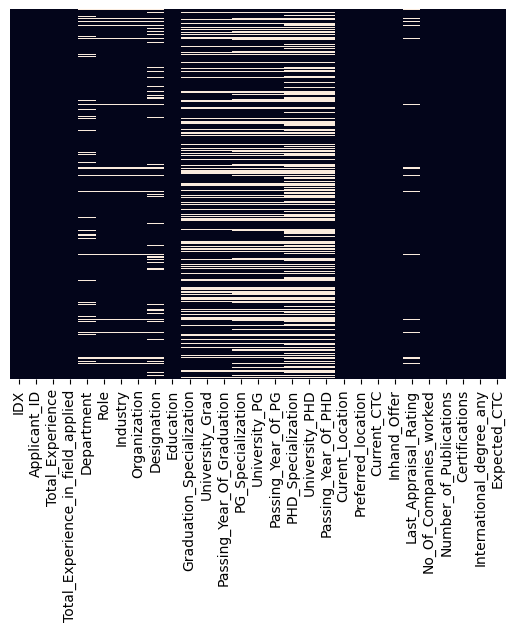

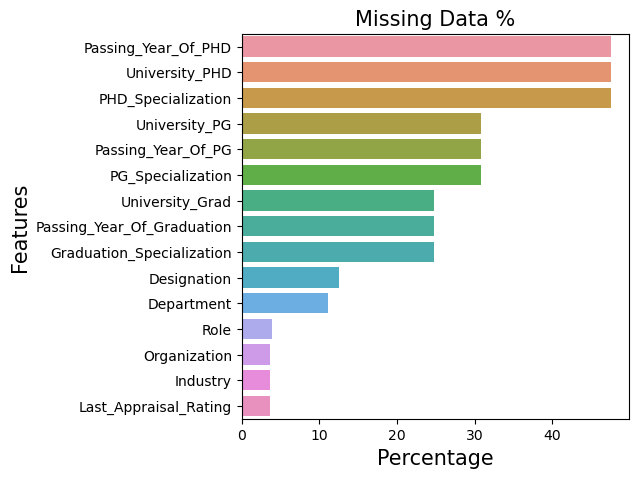

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def get_missing_data_details(hrdata):
    sns.heatmap(hrdata.isnull(), yticklabels=False, cbar=False)
    total = hrdata.isnull().sum().sort_values(ascending=False)
    percent = ((hrdata.isnull().sum() / hrdata.isnull().count()) * 100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"] > 0]

    plt.figure(figsize=(5, 5))
    sns.barplot(x=missing["Percent"], y=missing.index)
    plt.xlabel('Percentage', fontsize=15)
    plt.ylabel('Features', fontsize=15)
    plt.title('Missing Data %', fontsize=15)

    plt.show()  

# Call the function with your hrdata
get_missing_data_details(hrdata)


In [10]:
hrdata.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
PG_Specialization                     7692
University_PG                         7692
PHD_Specialization                   11881
University_PHD                       11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_Publications                   0
Certifications                           0
International_degree_any                 0
Expected_CT

## droping the unnessary columns¶

In [6]:
hrdata = hrdata.drop(['IDX','Applicant_ID','Passing_Year_Of_PHD','Passing_Year_Of_PG','Passing_Year_Of_Graduation'], axis=1)


In [7]:
hrdata.duplicated().sum()

0

In [8]:
hrdata['Department'].fillna('Other', inplace=True)
hrdata['Role'].fillna('Other', inplace=True)
hrdata['Industry'].fillna('Other', inplace=True)
hrdata['Designation'].fillna('Other', inplace=True)
hrdata['Role'] = hrdata['Role'].replace('Others', 'Other')
hrdata['Department'] = hrdata['Department'].replace('Others', 'Other')
hrdata['Industry'] = hrdata['Industry'].replace('Others', 'Other')
hrdata['Designation'] = hrdata['Designation'].replace('Others', 'Other')

In [13]:
hrdata.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Other,Other,Other,NaN,Other,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,Other,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


## Uni-variate / Bi-variate / Multi-variate analysis to understand relationship b/w variables.

## Univariate analysis

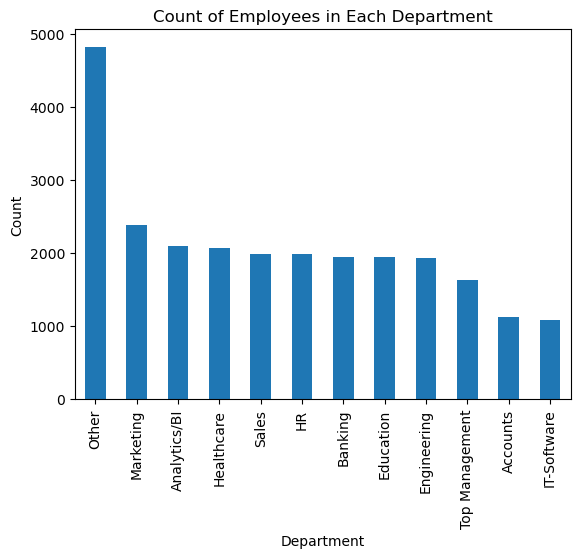

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

if 'Department' in hrdata.columns:
    # Create a bar plot for the count of each department
    hrdata['Department'].value_counts().plot(kind='bar')
    
    # Set plot title and labels
    plt.title('Count of Employees in Each Department')
    plt.xlabel('Department')
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()
else:
    print("'Department' column not found in the DataFrame.")


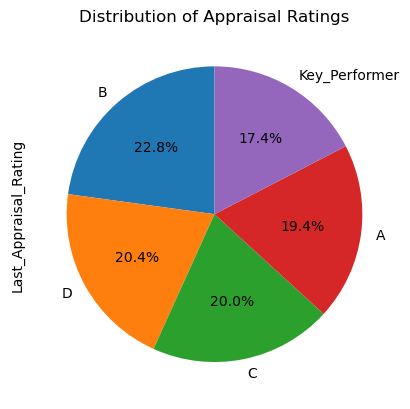

In [15]:

if 'Last_Appraisal_Rating' in hrdata.columns:
    # Create a pie chart for the distribution of appraisal ratings
    hrdata['Last_Appraisal_Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    
    # Set plot title
    plt.title('Distribution of Appraisal Ratings')
    
    # Show the plot
    plt.show()

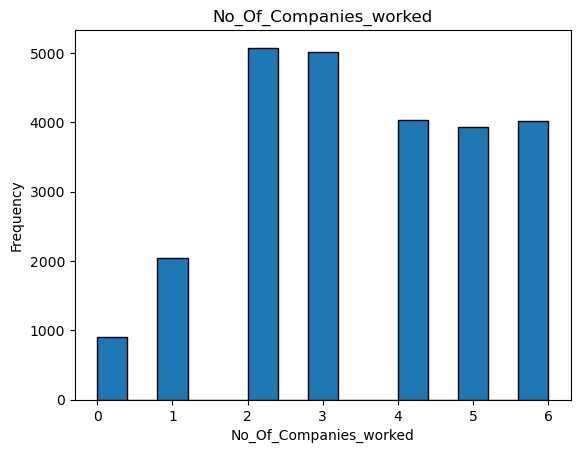

In [16]:
plt.hist(hrdata['No_Of_Companies_worked'], bins=15, edgecolor='black')

# Set plot title and labels
plt.title('No_Of_Companies_worked')
plt.xlabel('No_Of_Companies_worked')
plt.ylabel('Frequency')

# Show the plot
plt.show()

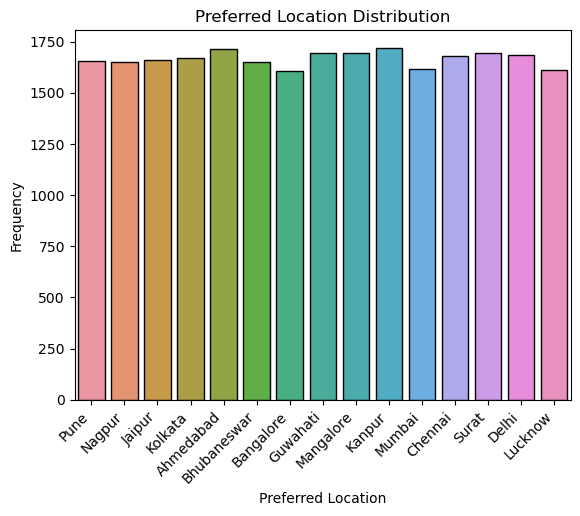

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create the countplot
sns.countplot(data=hrdata, x='Preferred_location', edgecolor='black')

# Set plot title and labels
plt.title('Preferred Location Distribution')
plt.xlabel('Preferred Location')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


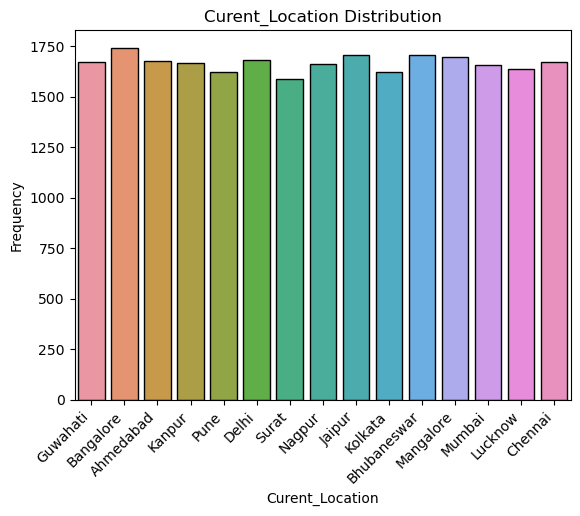

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the countplot
sns.countplot(data=hrdata, x='Curent_Location', edgecolor='black')

# Set plot title and labels
plt.title('Curent_Location Distribution')
plt.xlabel('Curent_Location')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

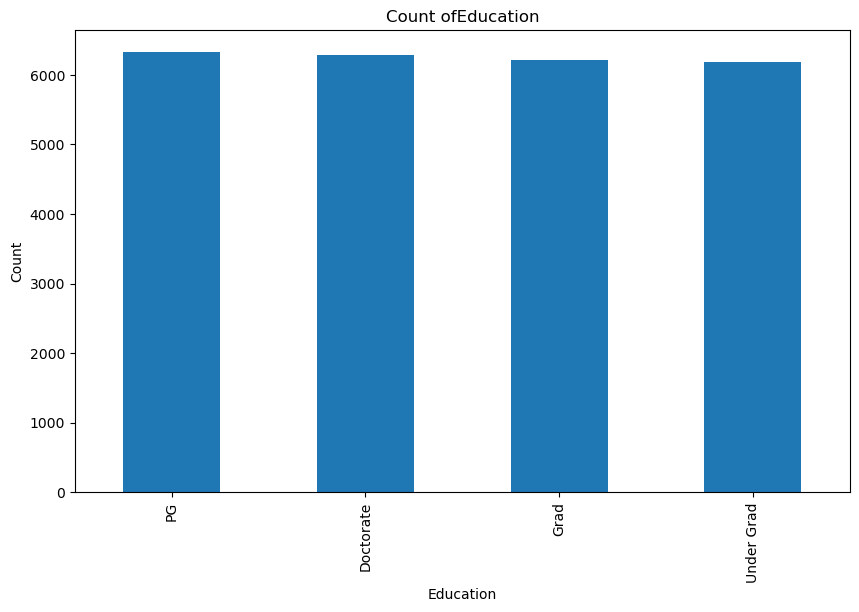

In [17]:
hrdata['Education'].value_counts().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Count ofEducation')
plt.xlabel('Education')
plt.ylabel('Count')

# Show the plot
plt.show()

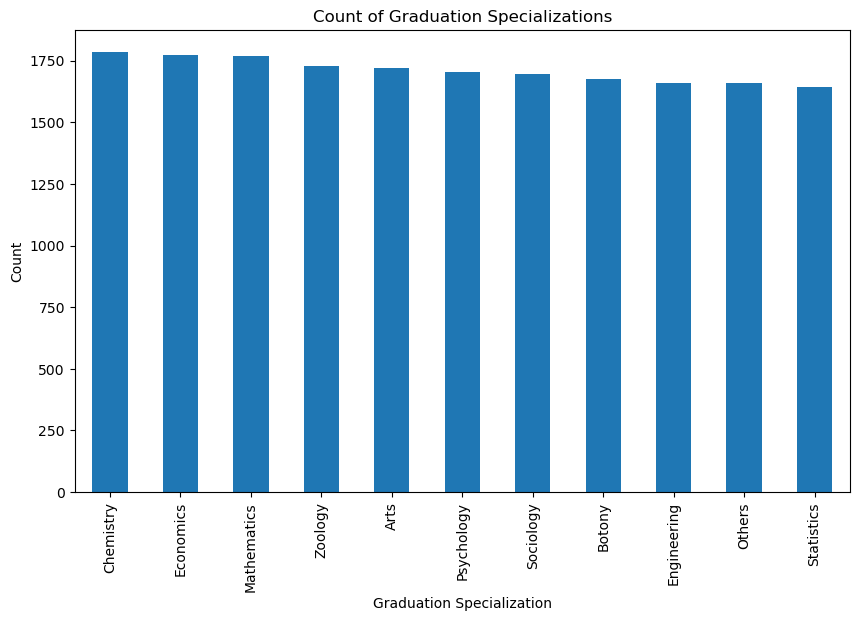

In [18]:

# Plot the bar chart for the count of each specialization
hrdata['Graduation_Specialization'].value_counts().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Count of Graduation Specializations')
plt.xlabel('Graduation Specialization')
plt.ylabel('Count')

# Show the plot
plt.show()


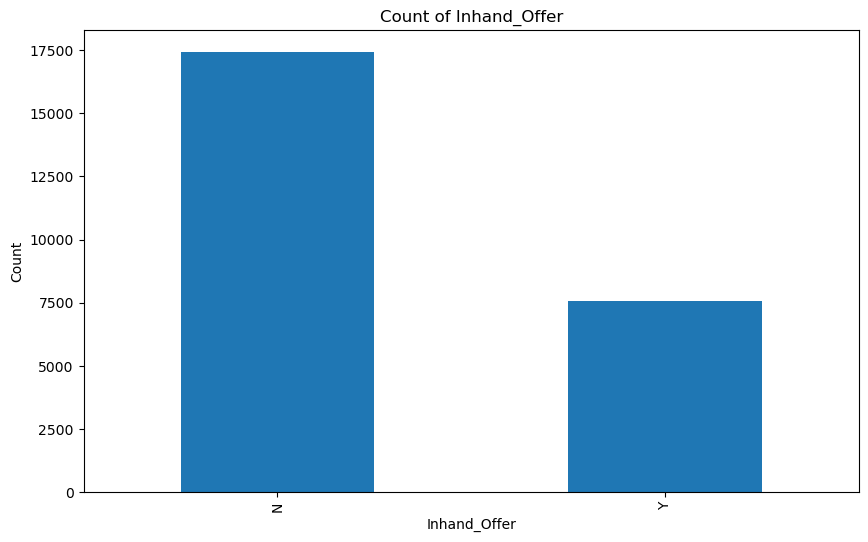

In [19]:
hrdata['Inhand_Offer'].value_counts().plot(kind='bar', figsize=(10, 6))

# Set plot title and labels
plt.title('Count of Inhand_Offer')
plt.xlabel('Inhand_Offer')
plt.ylabel('Count')

# Show the plot
plt.show()

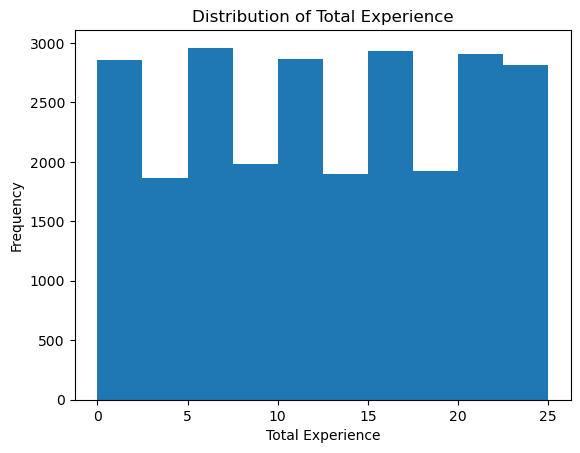

In [20]:
import matplotlib.pyplot as plt

# Assuming hrdata is the DataFrame containing the 'Total_Experience' column

# Plot the histogram
plt.hist(hrdata['Total_Experience'], bins=10)

# Set plot title and labels
plt.xlabel('Total Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Total Experience')

# Show the plot
plt.show()


In [21]:
education_counts = hrdata['Education'].value_counts()
print(education_counts)

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Education, dtype: int64


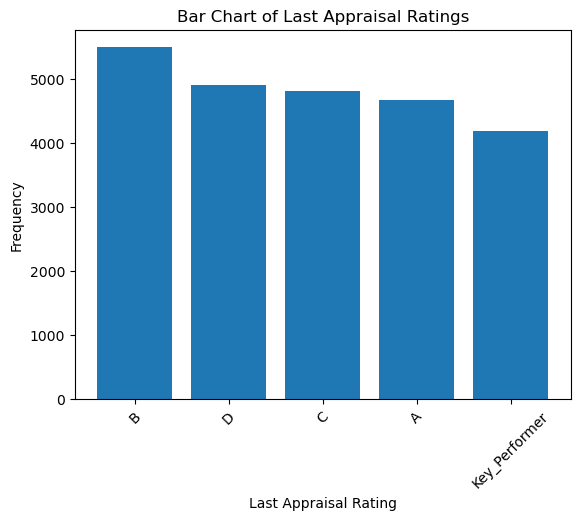

In [22]:
import matplotlib.pyplot as plt

appraisal_counts = hrdata['Last_Appraisal_Rating'].value_counts()
plt.bar(appraisal_counts.index, appraisal_counts.values)
plt.xlabel('Last Appraisal Rating')
plt.ylabel('Frequency')
plt.title('Bar Chart of Last Appraisal Ratings')
plt.xticks(rotation=45)
plt.show()

array([[<Axes: title={'center': 'Total_Experience'}>,
        <Axes: title={'center': 'Total_Experience_in_field_applied'}>,
        <Axes: title={'center': 'Current_CTC'}>],
       [<Axes: title={'center': 'No_Of_Companies_worked'}>,
        <Axes: title={'center': 'Number_of_Publications'}>,
        <Axes: title={'center': 'Certifications'}>],
       [<Axes: title={'center': 'International_degree_any'}>,
        <Axes: title={'center': 'Expected_CTC'}>, <Axes: >]], dtype=object)

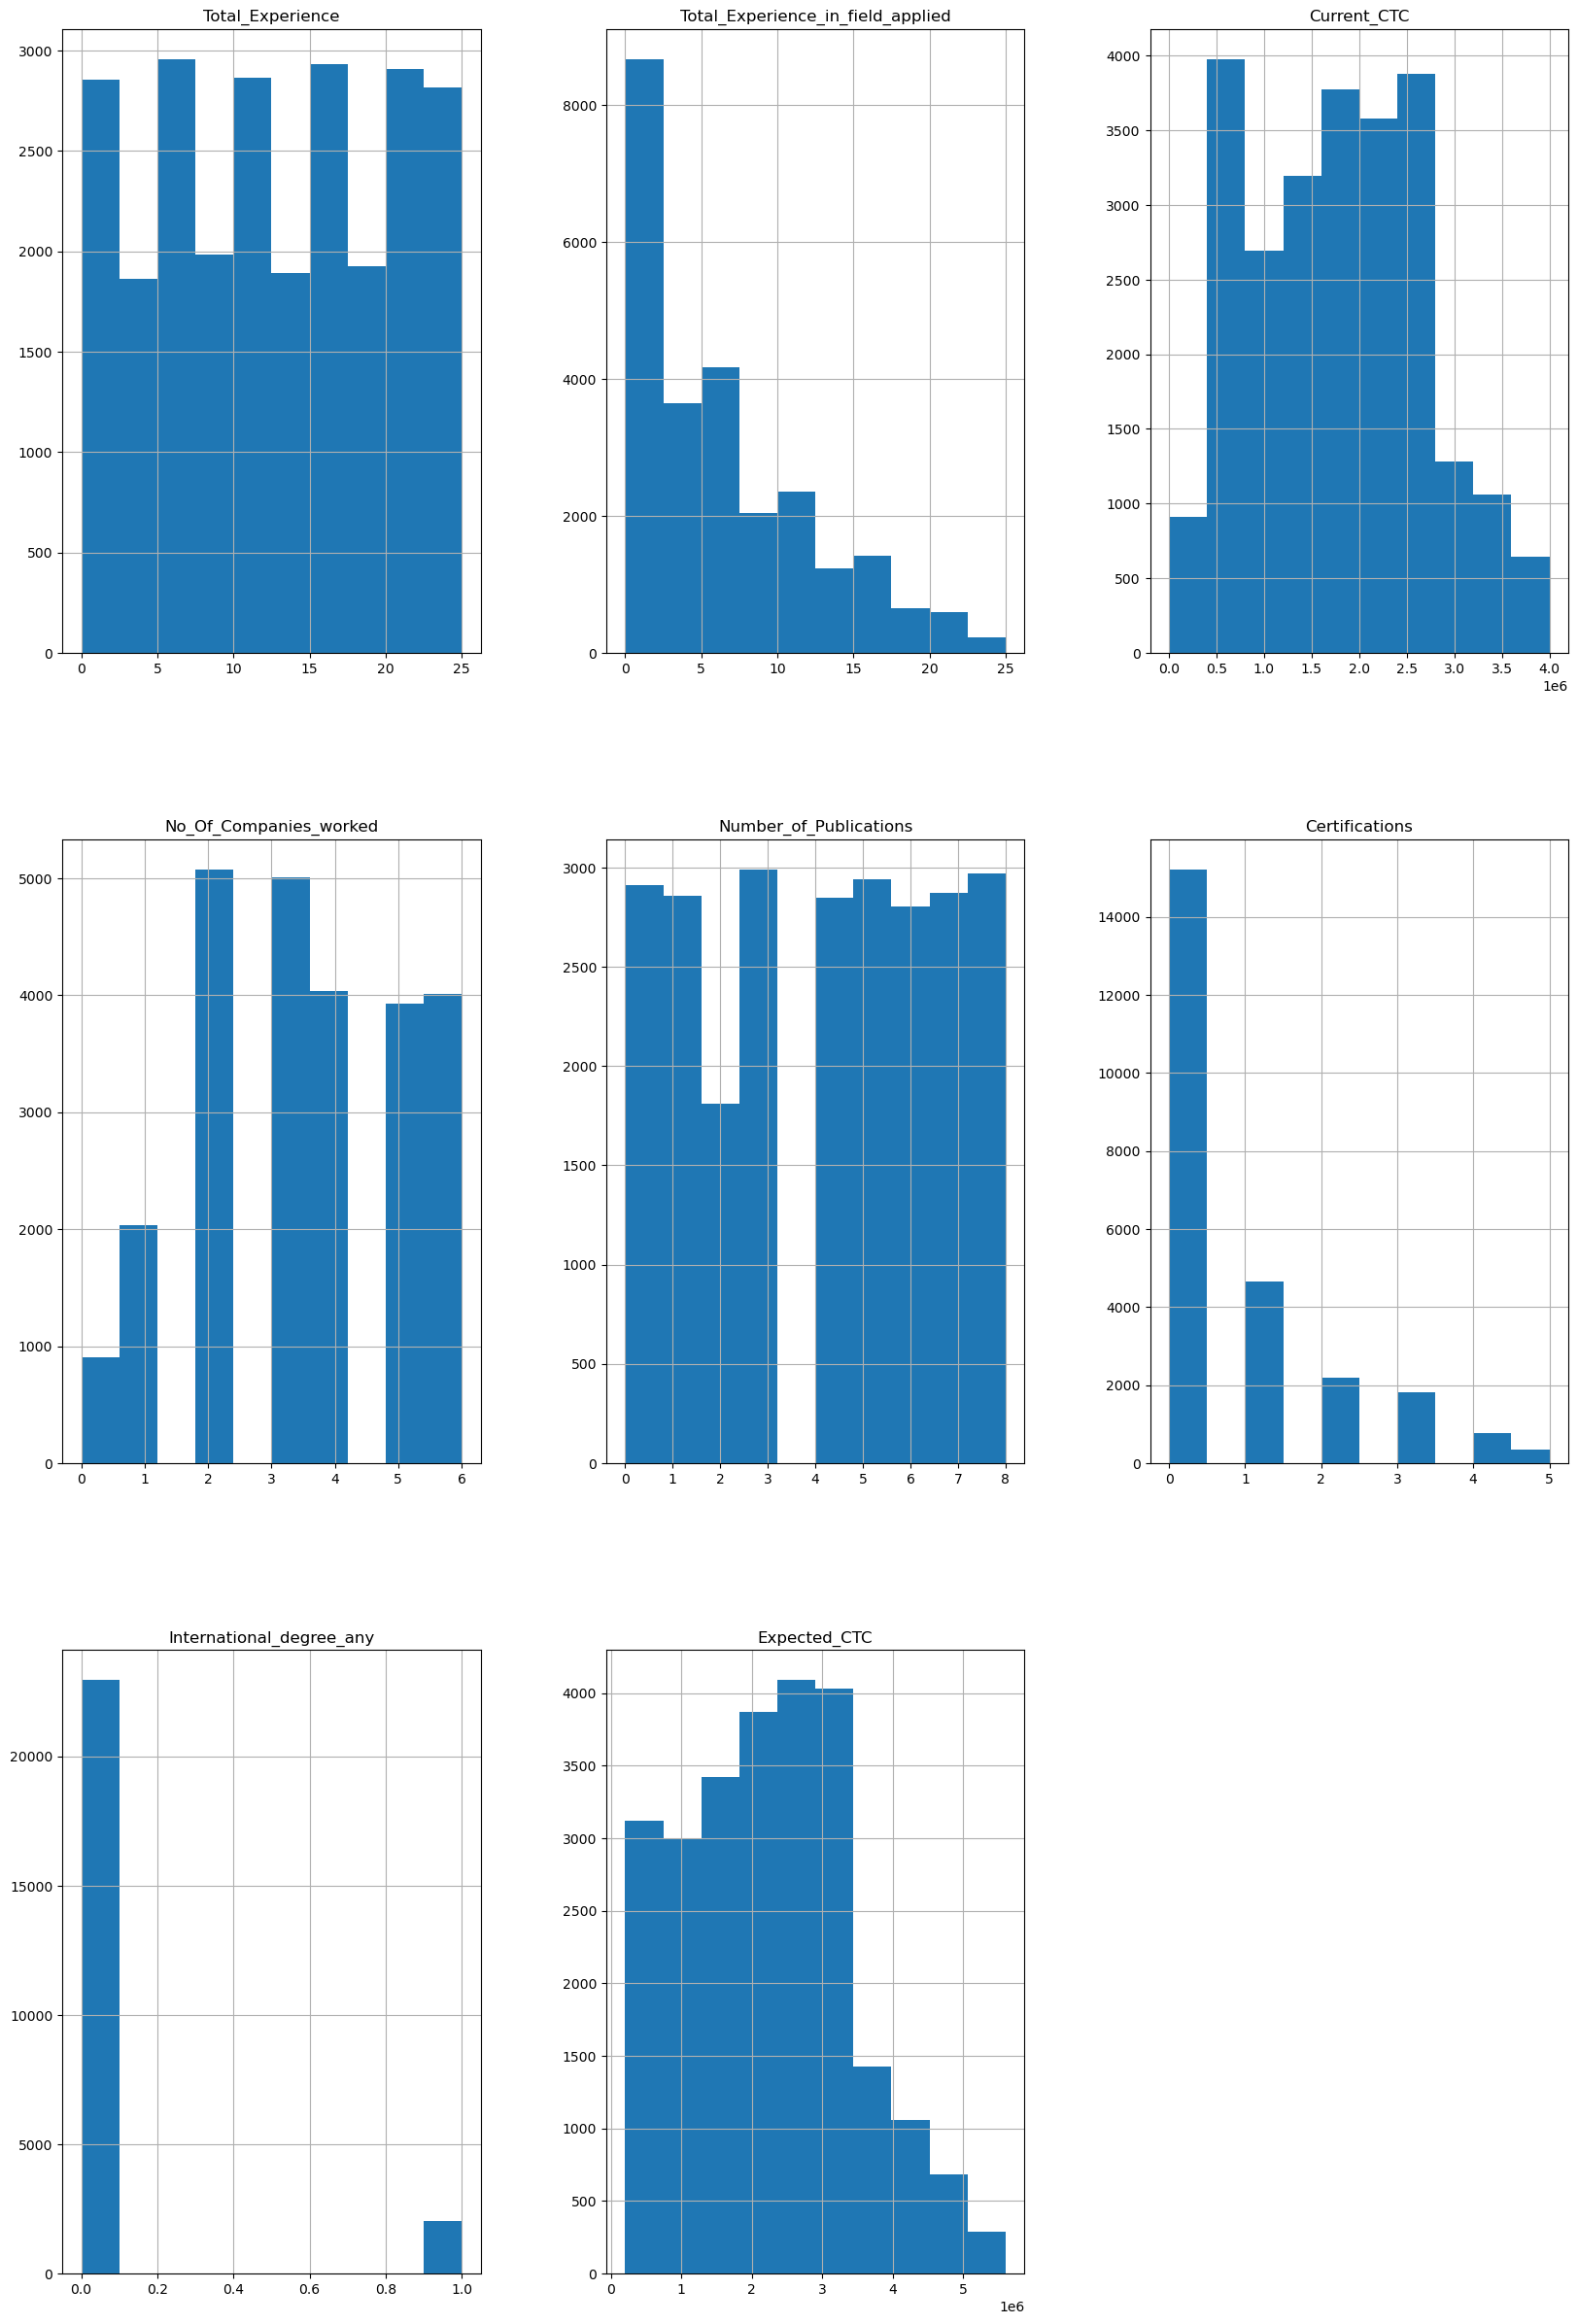

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

hrdata.hist(figsize=(20,30))

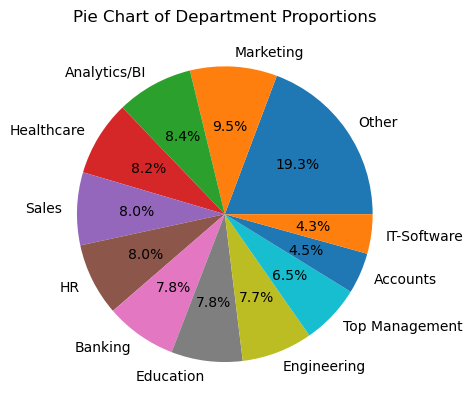

In [24]:
import matplotlib.pyplot as plt

department_proportions = hrdata['Department'].value_counts(normalize=True)
plt.pie(department_proportions, labels=department_proportions.index, autopct='%1.1f%%')
plt.title('Pie Chart of Department Proportions')
plt.show()

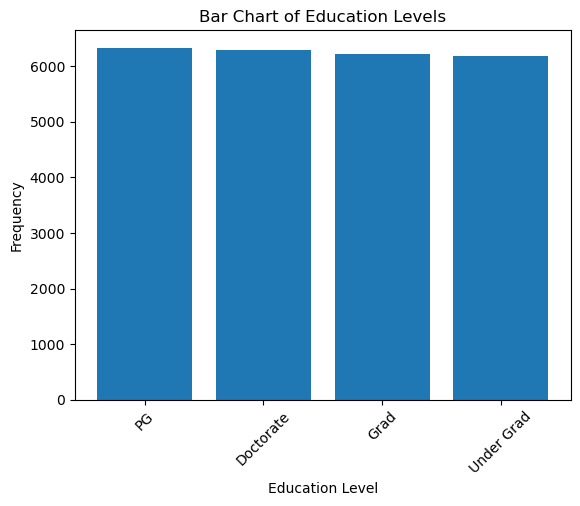

In [25]:
import matplotlib.pyplot as plt

education_counts = hrdata['Education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Bar Chart of Education Levels')
plt.xticks(rotation=45)
plt.show()

## Bi Variate analysis 

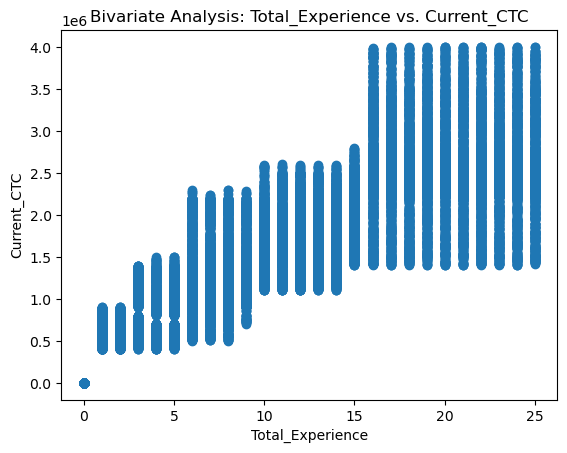

In [26]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(hrdata['Total_Experience'], hrdata['Current_CTC'])

# Set plot title and labels
plt.xlabel('Total_Experience')
plt.ylabel('Current_CTC')
plt.title('Bivariate Analysis: Total_Experience vs. Current_CTC')

# Show the plot
plt.show()


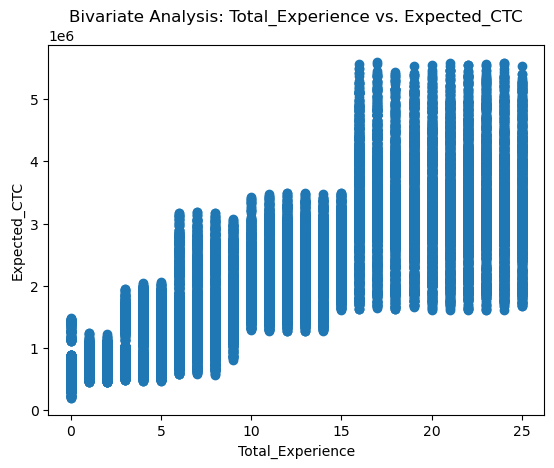

In [27]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(hrdata['Total_Experience'], hrdata['Expected_CTC'])

# Set plot title and labels
plt.xlabel('Total_Experience')
plt.ylabel('Expected_CTC')
plt.title('Bivariate Analysis: Total_Experience vs. Expected_CTC')

# Show the plot
plt.show()

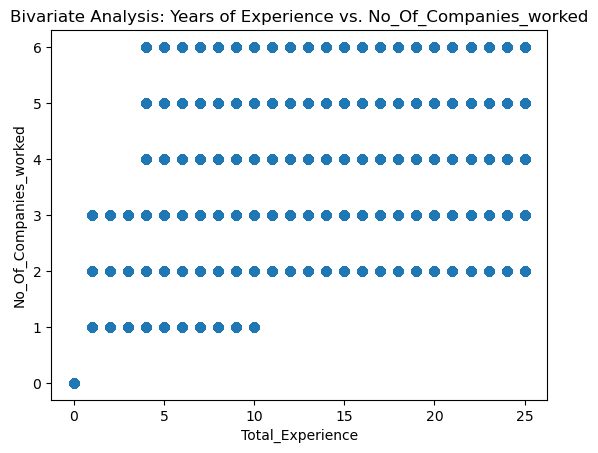

In [28]:


# 'Years_of_Experience' and 'No_Of_Companies_worked' columns

# Create a scatter plot
plt.scatter(hrdata['Total_Experience'], hrdata['No_Of_Companies_worked'])

# Set plot title and labels
plt.xlabel('Total_Experience')
plt.ylabel('No_Of_Companies_worked')
plt.title('Bivariate Analysis: Years of Experience vs. No_Of_Companies_worked')

# Show the plot
plt.show()


<Axes: xlabel='Education', ylabel='Current_CTC'>

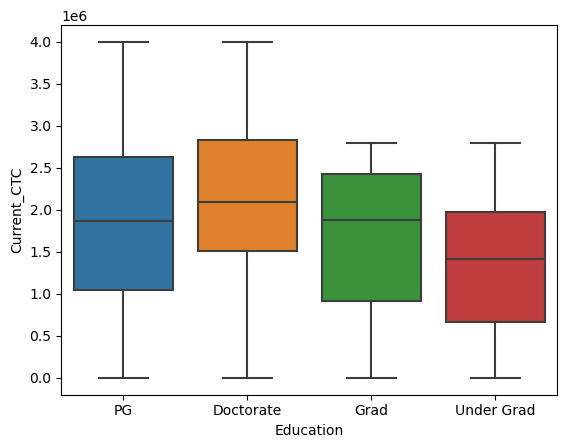

In [29]:
import seaborn as sns

sns.boxplot(x="Education", y="Current_CTC", data=hrdata)

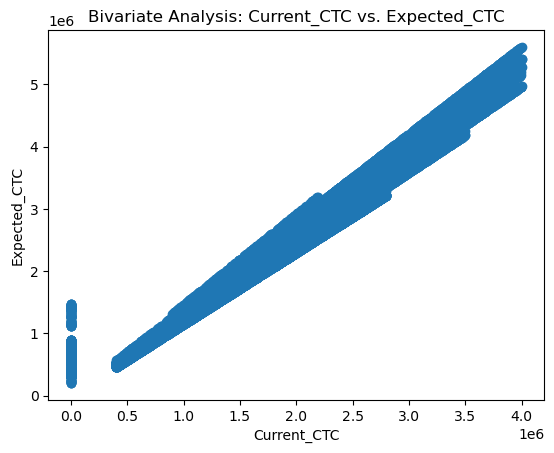

In [12]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(hrdata['Current_CTC'], hrdata['Expected_CTC'])

# Set plot title and labels
plt.xlabel('Current_CTC')
plt.ylabel('Expected_CTC')
plt.title('Bivariate Analysis: Current_CTC vs. Expected_CTC')

# Show the plot
plt.show()

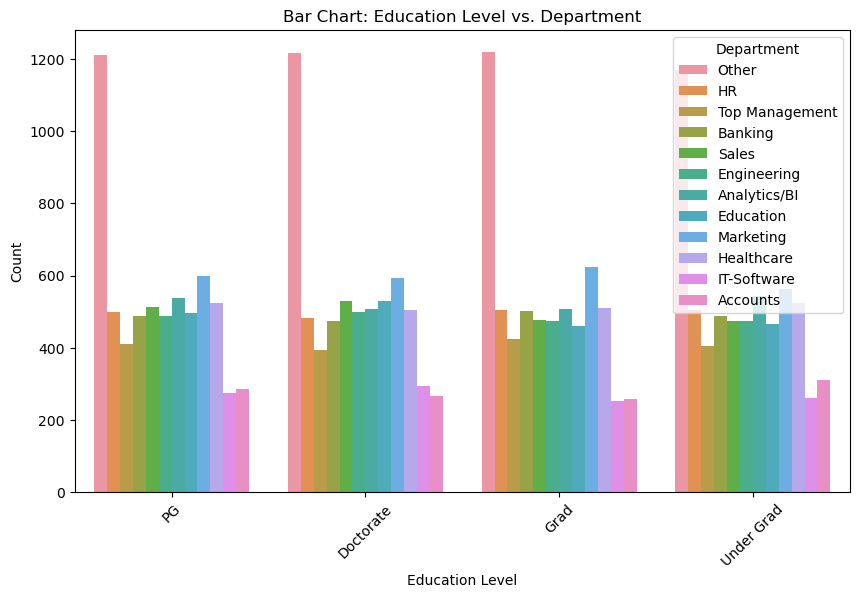

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=hrdata, x='Education', hue='Department')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Bar Chart: Education Level vs. Department')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.show()

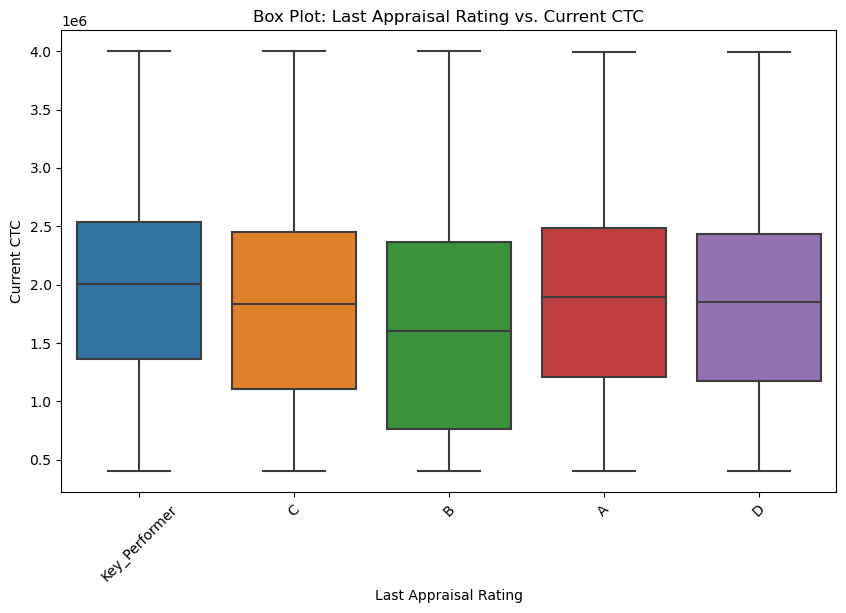

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=hrdata, x='Last_Appraisal_Rating', y='Current_CTC')
plt.xlabel('Last Appraisal Rating')
plt.ylabel('Current CTC')
plt.title('Box Plot: Last Appraisal Rating vs. Current CTC')
plt.xticks(rotation=45)
plt.show()

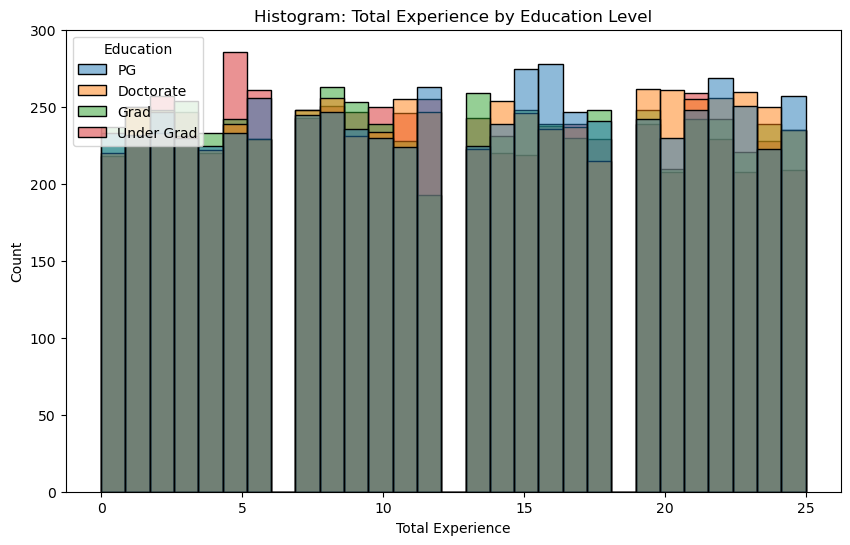

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=hrdata, x='Total_Experience', hue='Education')
plt.xlabel('Total Experience')
plt.ylabel('Count')
plt.title('Histogram: Total Experience by Education Level')
plt.show()

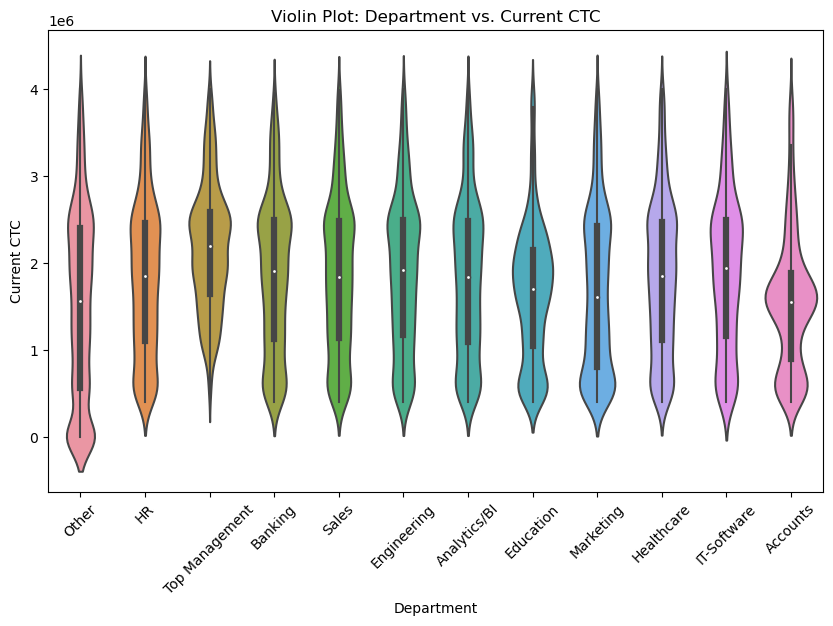

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=hrdata, x='Department', y='Current_CTC')
plt.xlabel('Department')
plt.ylabel('Current CTC')
plt.title('Violin Plot: Department vs. Current CTC')
plt.xticks(rotation=45)
plt.show()

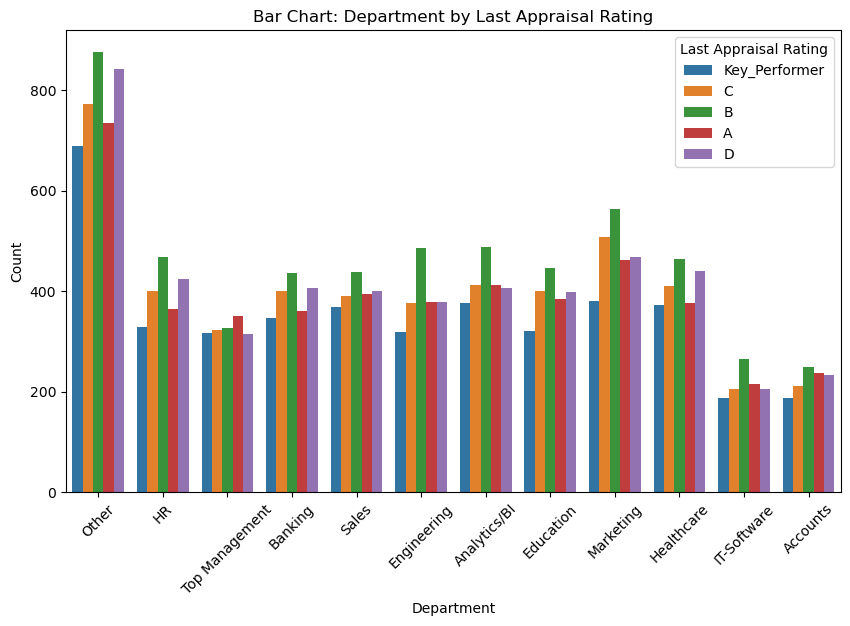

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=hrdata, x='Department', hue='Last_Appraisal_Rating')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Bar Chart: Department by Last Appraisal Rating')
plt.xticks(rotation=45)
plt.legend(title='Last Appraisal Rating')
plt.show()

## MULTIVARIATE ANALYSIS

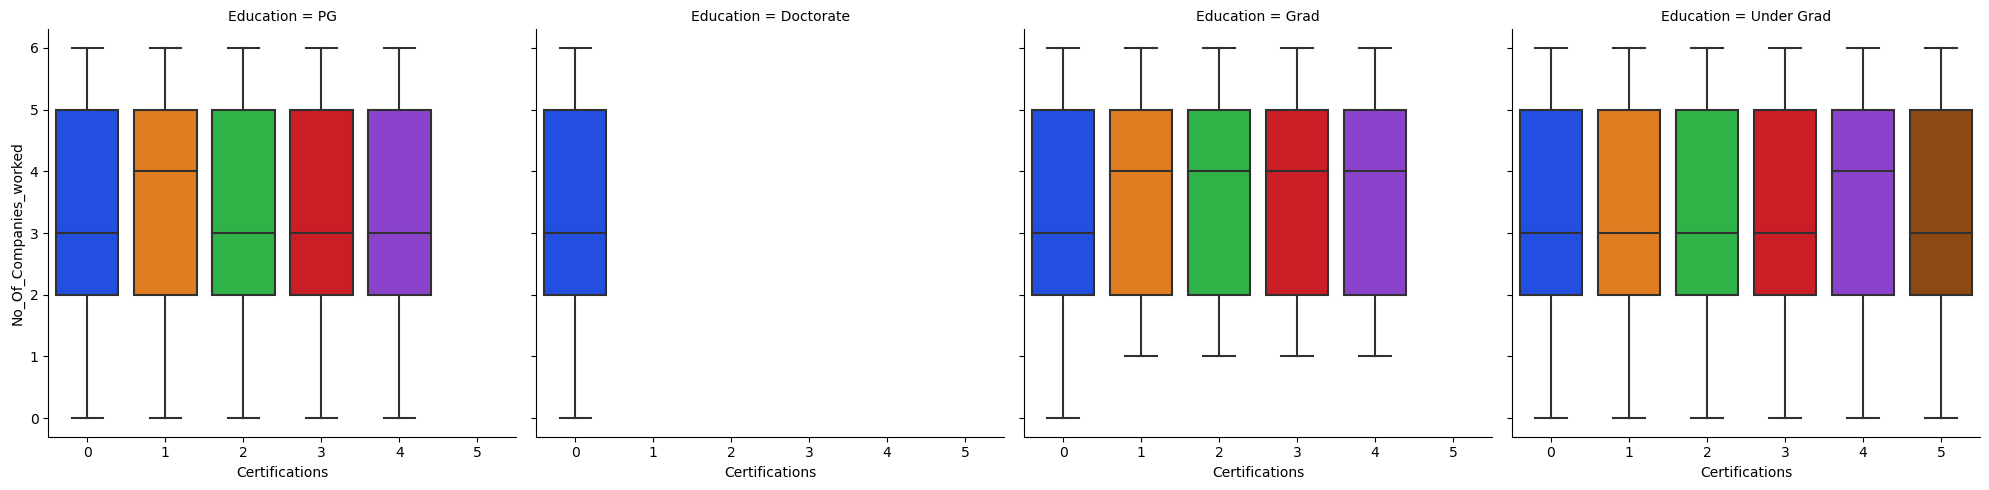

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Certifications", y="No_Of_Companies_worked", col="Education", col_wrap=4, data=hrdata, kind="box", ci=False, palette='bright', aspect=1)

plt.show()

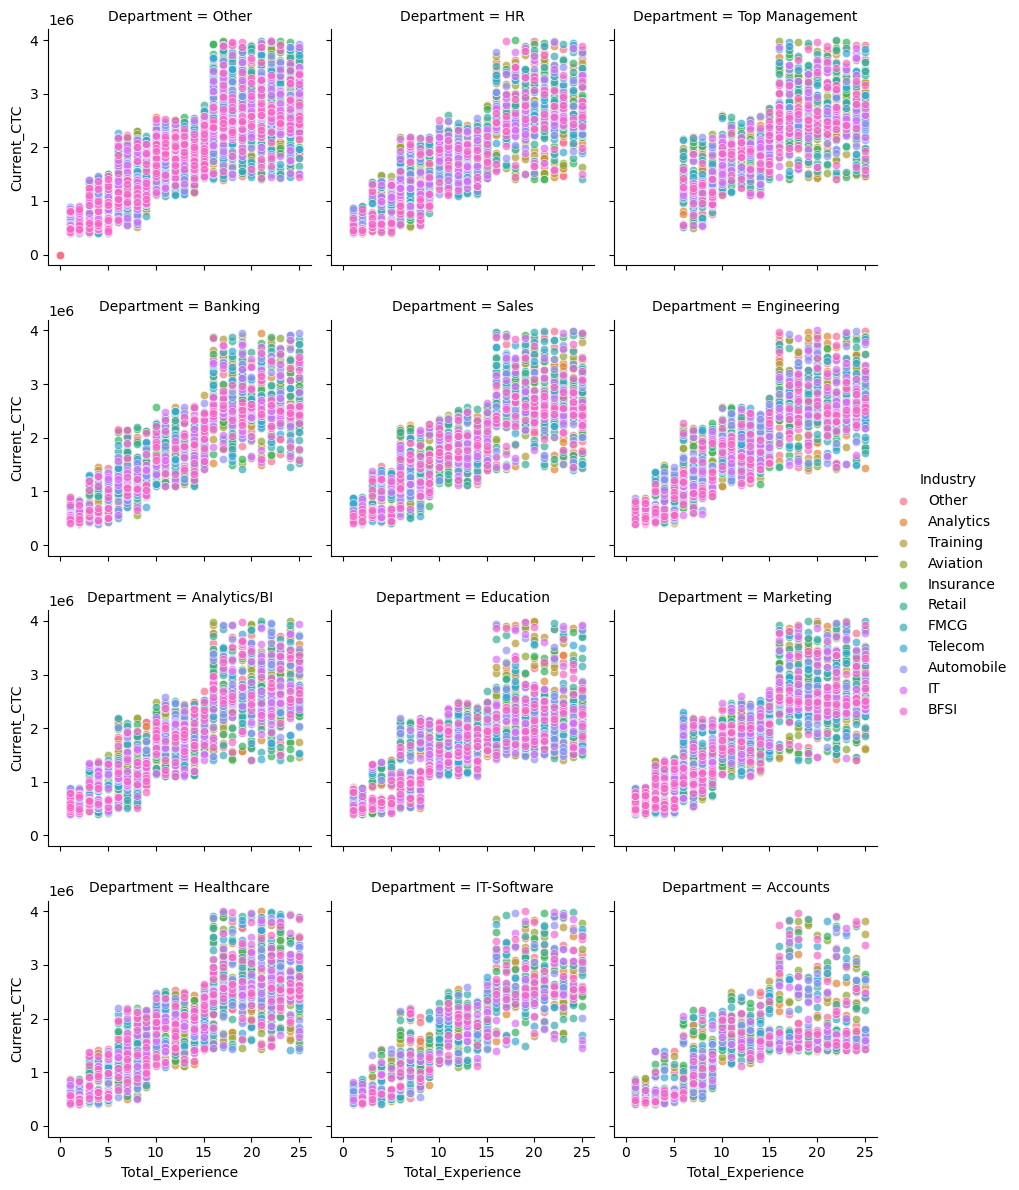

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(hrdata, col="Department", hue="Industry", col_wrap=3)
g.map(sns.scatterplot, "Total_Experience", "Current_CTC", alpha=0.7)
g.add_legend()

plt.show()

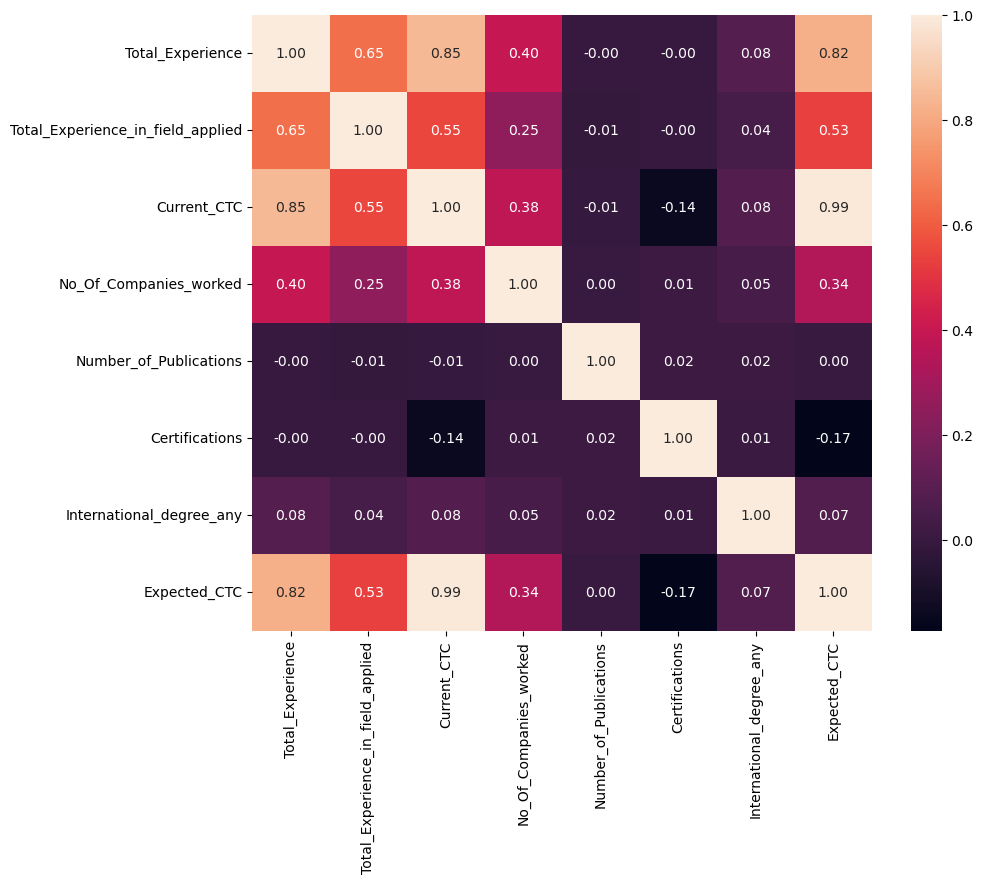

In [37]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(hrdata.corr(), annot=True,fmt='.2f');

In [38]:
hrdata.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Other,Other,Other,NaN,Other,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,Other,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


## feture selelction- Droping insgnificate varaiable by the probabilty after Annova Test.

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 
# Specify the formula for the ANOVA analysis
formula = 'Expected_CTC ~ Total_Experience + Total_Experience_in_field_applied + Department + Role + Industry + Organization + Designation + Education + Graduation_Specialization + University_Grad + PG_Specialization + University_PG + PHD_Specialization + University_PHD + Curent_Location + Preferred_location + Current_CTC + Inhand_Offer + Last_Appraisal_Rating + No_Of_Companies_worked + Number_of_Publications + Certifications + International_degree_any'

# Fit the ANOVA model
model = ols(formula, data=hrdata).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table with p-values and F-values
print(anova_table)


                                        df        sum_sq       mean_sq  \
Department                            11.0  4.499253e+14  4.090230e+13   
Role                                  23.0  1.451111e+15  6.309176e+13   
Industry                              10.0  1.327858e+13  1.327858e+12   
Organization                          15.0  1.817876e+13  1.211917e+12   
Designation                           17.0  7.902157e+13  4.648328e+12   
Education                              3.0  1.399822e+15  4.666074e+14   
Graduation_Specialization             10.0  1.552697e+13  1.552697e+12   
University_Grad                       12.0  1.085806e+13  9.048386e+11   
PG_Specialization                     10.0  7.868856e+12  7.868856e+11   
University_PG                         12.0  9.538955e+12  7.949129e+11   
PHD_Specialization                    10.0  5.038653e+12  5.038653e+11   
University_PHD                        12.0  1.211022e+13  1.009185e+12   
Curent_Location                       

In [40]:
 hrdata = hrdata.drop(['Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD'], axis=1)

In [41]:
hrdata.shape

(25000, 18)

In [42]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Organization                       24092 non-null  object
 6   Designation                        25000 non-null  object
 7   Education                          25000 non-null  object
 8   Curent_Location                    25000 non-null  object
 9   Preferred_location                 25000 non-null  object
 10  Current_CTC                        25000 non-null  int64 
 11  Inhand_Offer                       25000 non-null  object
 12  Last

In [43]:
for column in hrdata.columns:
    if hrdata[column].dtype == 'object':
        print(column.upper(),': ',hrdata[column].nunique())
        print(hrdata[column].value_counts().sort_values())
        print('\n')

DEPARTMENT :  12
IT-Software       1078
Accounts          1118
Top Management    1632
Engineering       1937
Education         1948
Banking           1952
HR                1988
Sales             1991
Healthcare        2062
Analytics/BI      2096
Marketing         2379
Other             4819
Name: Department, dtype: int64


ROLE :  24
Lab Executuve             25
Professor                 33
Research Scientist        33
Sr. Business Analyst     114
Researcher               123
Senior Analyst           128
Area Sales Manager       134
Principal Analyst        275
Data scientist           363
Associate                767
Head                    1108
Scientist               1139
CEO                     1149
Financial Analyst       1182
Senior Researcher       1236
Sales Manager           1427
Sales Execituve         1574
Business Analyst        1711
Consultant              1780
Team Lead               1833
Project Manager         1850
Analyst                 1892
Bio statistician        1

In [44]:
for column in hrdata.select_dtypes(include="object"):
    # Calculate the mode of the column
    mode_value = hrdata[column].mode().iloc[0]
    # Replace missing values with the mode
    hrdata[column].fillna(mode_value, inplace=True)

In [45]:
hrdata.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [46]:
hrdata.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Other,Other,Other,M,Other,PG,Guwahati,Pune,0,N,B,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,Other,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [47]:
hrdata.shape

(25000, 18)

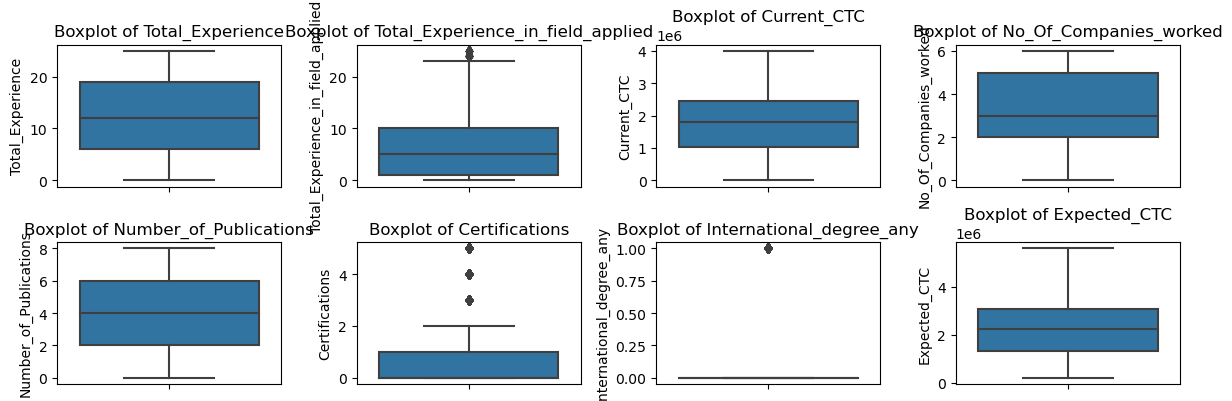

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns
numeric_columns = hrdata.select_dtypes(include=['int', 'float'])

# Plot boxplots for each numeric feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_columns.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=numeric_columns[feature], data=hrdata)
    plt.title('Boxplot of {}'.format(feature))
    plt.tight_layout()

plt.show()

In [49]:
import pandas as pd
import numpy as np

def remove_outlier(col):
    col = pd.to_numeric(col, errors='coerce')
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

feature_list = hrdata.columns

for feature in feature_list:
    LL, UL = remove_outlier(hrdata[feature])
    hrdata[feature] = np.where(hrdata[feature] > UL, UL, hrdata[feature])
    hrdata[feature] = np.where(hrdata[feature] < LL, LL, hrdata[feature])

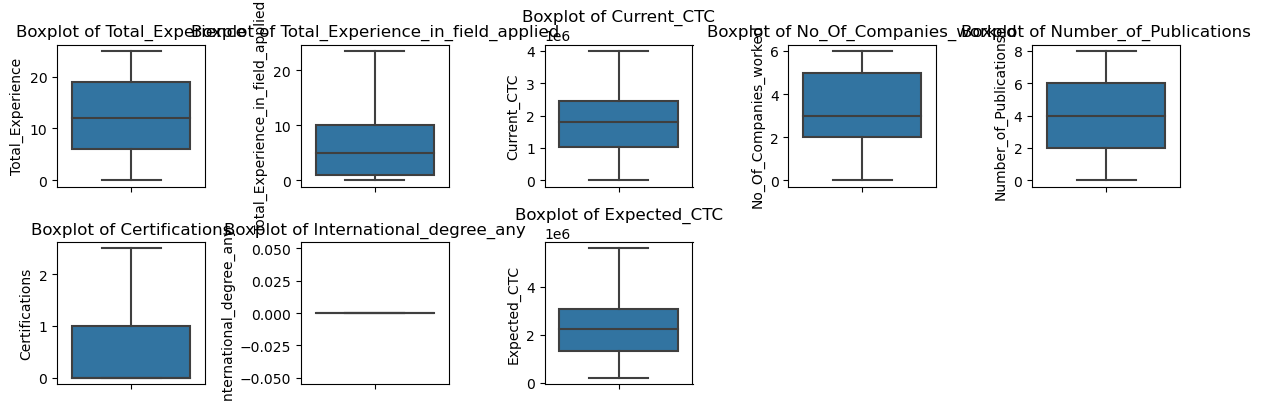

In [50]:
plt.figure(figsize=(12, 8))
numeric_features = hrdata.select_dtypes(include=[np.number]).columns

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=hrdata[feature], data=hrdata)
    plt.title('Boxplot of {}'.format(feature))
    plt.tight_layout()

In [51]:
new_hrdata2=hrdata

In [52]:
new_hrdata2['Designation'].unique()

array(['Other', 'HR', 'Medical Officer', 'Director', 'Marketing Manager',
       'Manager', 'Product Manager', 'Consultant', 'CA',
       'Research Scientist', 'Sr.Manager', 'Data Analyst',
       'Assistant Manager', 'Web Designer', 'Research Analyst',
       'Software Developer', 'Network Engineer', 'Scientist'],
      dtype=object)

In [53]:
new_hrdata2['Role'].unique()

array(['Other', 'Consultant', 'Financial Analyst', 'Project Manager',
       'Area Sales Manager', 'Team Lead', 'Analyst', 'CEO',
       'Business Analyst', 'Sales Manager', 'Bio statistician',
       'Scientist', 'Research Scientist', 'Head', 'Associate',
       'Senior Researcher', 'Sales Execituve', 'Sr. Business Analyst',
       'Principal Analyst', 'Data scientist', 'Researcher',
       'Senior Analyst', 'Professor', 'Lab Executuve'], dtype=object)

## Doing label and hot encdoing

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder                 

In [55]:
categorical_cols = ['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education',
                    'Curent_Location', 'Preferred_location', 'Inhand_Offer', 'Last_Appraisal_Rating']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in new_hrdata2.columns:
        new_hrdata2[col] = label_encoder.fit_transform(new_hrdata2[col].astype(str))

In [56]:
new_hrdata2.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0.0,0.0,9,11,7,12,10,2,5,13,0.0,0,1,0.0,0.0,0.0,0.0,384551.0
1,23.0,14.0,5,6,0,7,5,0,1,12,2702664.0,1,4,2.0,4.0,0.0,0.0,3783729.0
2,21.0,12.0,11,6,10,9,10,0,0,6,2236661.0,1,4,5.0,3.0,0.0,0.0,3131325.0
3,15.0,8.0,2,8,2,5,5,0,7,8,2100510.0,0,2,5.0,3.0,0.0,0.0,2608833.0
4,10.0,5.0,10,14,6,4,8,1,0,0,1931644.0,0,2,2.0,3.0,0.0,0.0,2221390.0


In [57]:

new_hrdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  float64
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         25000 non-null  int32  
 3   Role                               25000 non-null  int32  
 4   Industry                           25000 non-null  int32  
 5   Organization                       25000 non-null  int32  
 6   Designation                        25000 non-null  int32  
 7   Education                          25000 non-null  int32  
 8   Curent_Location                    25000 non-null  int32  
 9   Preferred_location                 25000 non-null  int32  
 10  Current_CTC                        25000 non-null  float64
 11  Inhand_Offer                       25000 non-null  int

## check balancing in the data

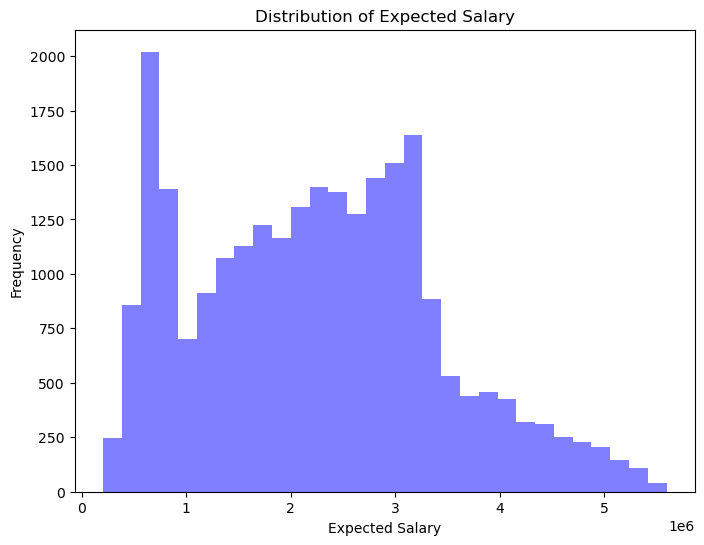

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(new_hrdata2['Expected_CTC'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Expected Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Salary')
plt.show()

### Removing skewness

In [59]:
import pandas as pd
from sklearn.preprocessing import Normalizer

In [60]:
numerical_cols = ['Total_Experience', 'Total_Experience_in_field_applied',
                   'Current_CTC', 'No_Of_Companies_worked',
                  'Number_of_Publications', 'Certifications', 'International_degree_any', 'Expected_CTC']


In [61]:
normalizer = Normalizer()
new_hrdata2[numerical_cols] = normalizer.fit_transform(new_hrdata2[numerical_cols])

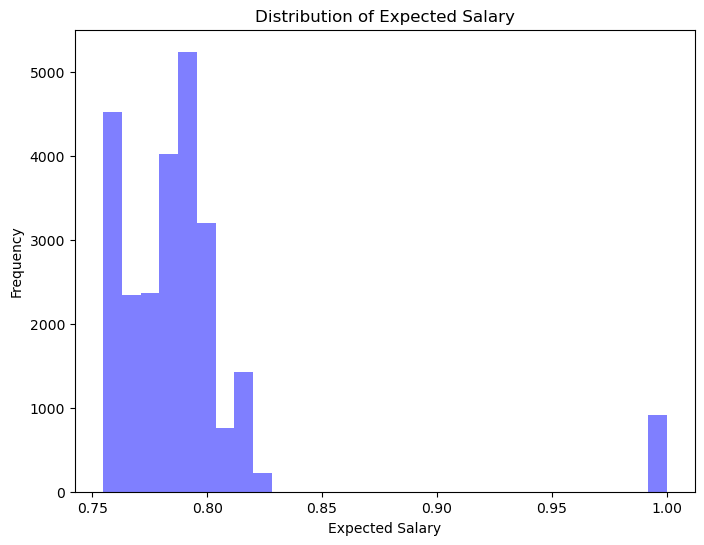

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(new_hrdata2['Expected_CTC'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Expected Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Salary')
plt.show()

In [63]:
new_hrdata2.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0.000000,0.000000,9,11,7,12,10,2,5,13,0.000000,0,1,0.000000e+00,0.000000e+00,0.0,0.0,1.000000
1,0.000005,0.000003,5,6,0,7,5,0,1,12,0.581238,1,4,4.301225e-07,8.602449e-07,0.0,0.0,0.813733
2,0.000005,0.000003,11,6,10,9,10,0,0,6,0.581238,1,4,1.299344e-06,7.796062e-07,0.0,0.0,0.813733
3,0.000004,0.000002,2,8,2,5,5,0,7,8,0.627139,0,2,1.492827e-06,8.956959e-07,0.0,0.0,0.778907
4,0.000003,0.000002,10,14,6,4,8,1,0,0,0.656179,0,2,6.793993e-07,1.019099e-06,0.0,0.0,0.754605


In [64]:
# Copy target into the y dataframe. 
y= new_hrdata2['Expected_CTC'].values

# Copy all the predictor variables into X dataframe
x = new_hrdata2.drop(['Expected_CTC'], axis=1)

In [65]:
print("Shape of X matrix is: ",x.shape)
print("Size of y : ",len(y))

Shape of X matrix is:  (25000, 17)
Size of y :  25000


In [66]:
#Splitting x and y into train and test dataset

X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=1)
print("shape of train :", X_train.shape,y_train.shape)
print("shape of test :", X_test.shape,y_test.shape)

shape of train : (17500, 17) (17500,)
shape of test : (7500, 17) (7500,)


## Linear regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a linear regression model
reg_model = LinearRegression()

# Fit the model to the training data
reg_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = reg_model.predict(X_train)
y_test_pred = reg_model.predict(X_test)

# Calculate R2 score and Adjusted R2 score for training dataset
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p_train - 1)

# Calculate R2 score and Adjusted R2 score for test dataset
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - p_test - 1)

# Calculate mean squared error (MSE) for training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for training and test datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute percentage error (MAPE) for training and test datasets
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Calculate mean absolute error (MAE) for training and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the model metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

print("MAE (Train):", mae_train)  # Adding MAE for training dataset
print("MAE (Test):", mae_test)    # Adding MAE for test dataset

print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)

print("Train Score:", reg_model.score(X_train, y_train))
print("Test Score:", reg_model.score(X_test, y_test))


Model Metrics:
R2 Score (Train): 0.9701086069492951
Adjusted R2 Score (Train): 0.970079539698302
R2 Score (Test): 0.9689252457487594
Adjusted R2 Score (Test): 0.968854640185772
RMSE (Train): 0.00769421969536993
RMSE (Test): 0.007732960011962491
MSE (Train): 5.920101672061853e-05
MSE (Test): 5.979867054661094e-05
MAE (Train): 0.006304941983356228
MAE (Test): 0.006352030183357052
MAPE (Train): 0.7992817763847834
MAPE (Test): 0.805875326541253
Train Score: 0.9701086069492951
Test Score: 0.9689252457487594


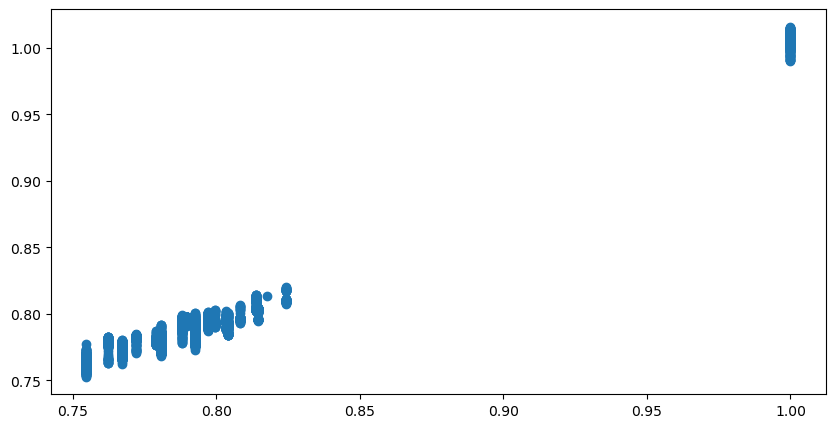

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10,5))
plt.scatter(y_test, reg_model.predict(X_test))


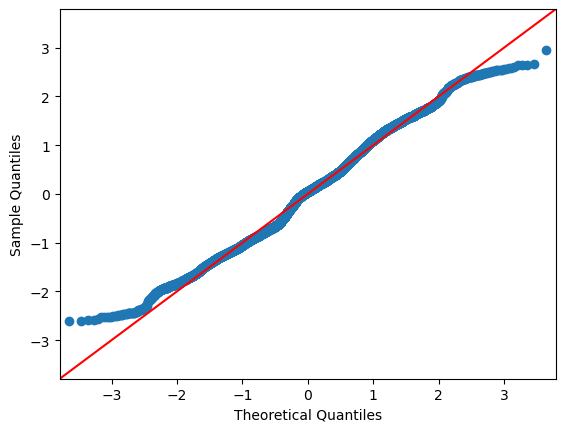

In [77]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## Applyting ridge regression or L2 regularization with diffrent value of alpha

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### at aplha 1.0

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)

print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)

print("Train Score:", ridge_model.score(X_train, y_train))
print("Test Score:", ridge_model.score(X_test, y_test))


Model Metrics:
R2 Score (Train): 0.9687591694343084
R2 Score (Test): 0.96734168955898
RMSE (Train): 0.007865979147907709
RMSE (Test): 0.007927545977735078
MSE (Train): 6.187362795531888e-05
MSE (Test): 6.284598522910361e-05
MAE (Train): 0.00641740057762926
MAE (Test): 0.006476917062034105
MAPE (Train): 0.008158396003493513
MAPE (Test): 0.008240425472763959
Train Score: 0.9687591694343084
Test Score: 0.96734168955898


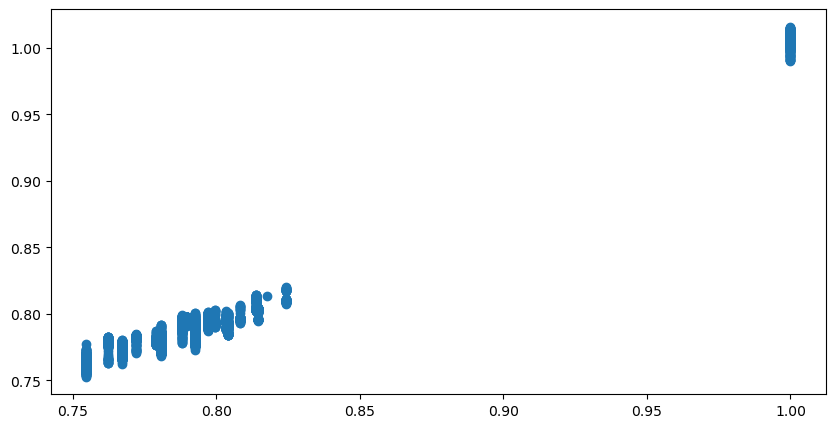

In [80]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, reg_model.predict(X_test))

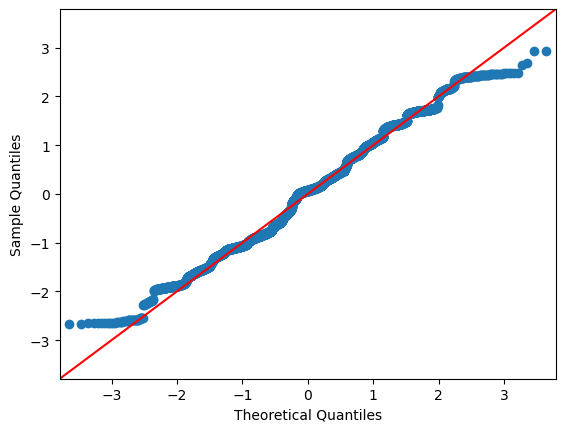

In [81]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

### at alpha 0.5



In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)

print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)

print("Train Score:", ridge_model.score(X_train, y_train))
print("Test Score:", ridge_model.score(X_test, y_test))


Model Metrics:
R2 Score (Train): 0.9687717684610588
R2 Score (Test): 0.9673657277584911
RMSE (Train): 0.007864392863648702
RMSE (Test): 0.00792462789948177
MSE (Train): 6.184867511380864e-05
MSE (Test): 6.279972734524486e-05
MAE (Train): 0.006421640787560747
MAE (Test): 0.006480447893758761
MAPE (Train): 0.008159035408168633
MAPE (Test): 0.008240319609266605
Train Score: 0.9687717684610588
Test Score: 0.9673657277584911


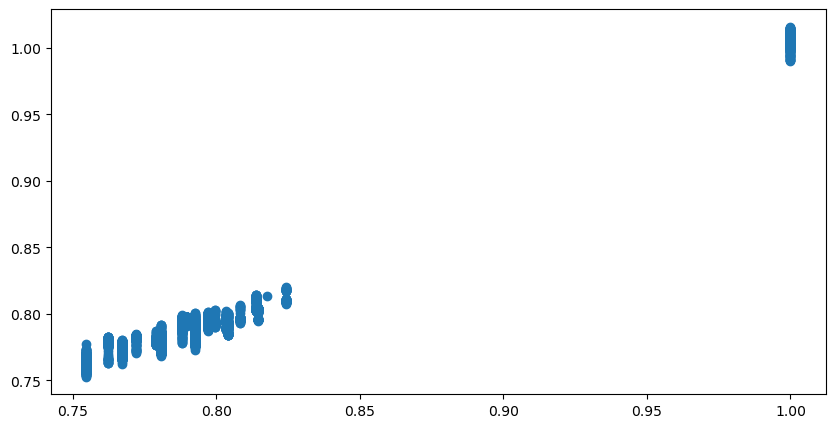

In [83]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, reg_model.predict(X_test))

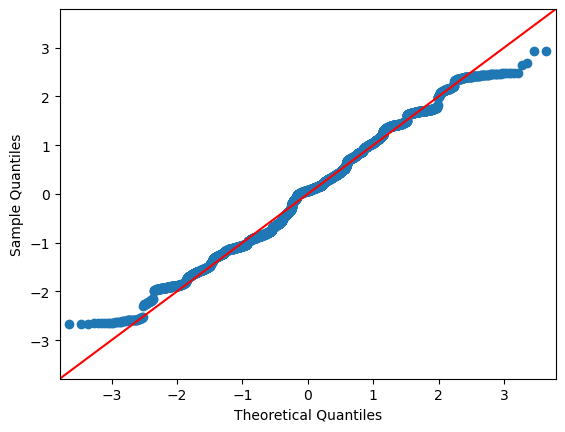

In [84]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

### at aplpha 0.0001

In [85]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.0001)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)

print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)

print("Train Score:", ridge_model.score(X_train, y_train))
print("Test Score:", ridge_model.score(X_test, y_test))


Model Metrics:
R2 Score (Train): 0.9687778139992179
R2 Score (Test): 0.9673832726198388
RMSE (Train): 0.007863631584733856
RMSE (Test): 0.007922497390963752
MSE (Train): 6.18367017004239e-05
MSE (Test): 6.276596490982745e-05
MAE (Train): 0.006425909305997616
MAE (Test): 0.006484003398766132
MAPE (Train): 0.008159691288508483
MAPE (Test): 0.008240223878100845
Train Score: 0.9687778139992179
Test Score: 0.9673832726198388


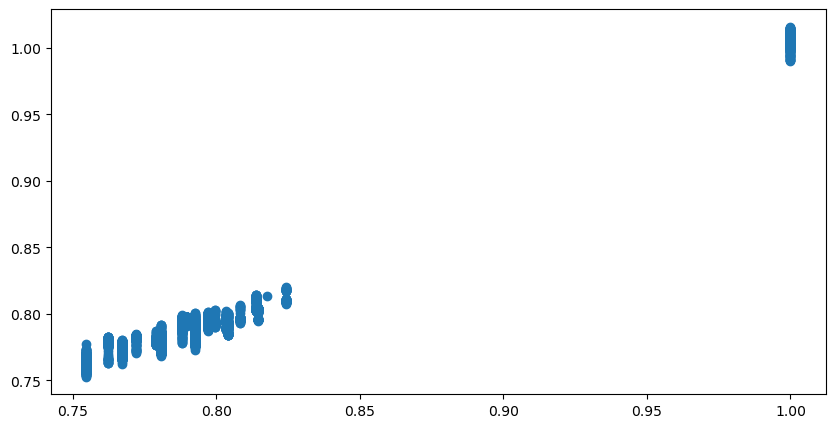

In [86]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, reg_model.predict(X_test))

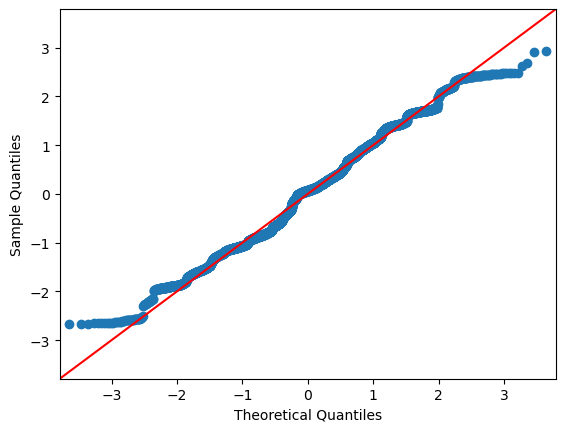

In [87]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## Cretating a Decesion tree model for regression

In [93]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate R2 score and Adjusted R2 score for training dataset
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p_train - 1)

# Calculate R2 score and Adjusted R2 score for test dataset
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - p_test - 1)

# Calculate mean squared error (MSE) for training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for training and test datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute error (MAE) for training and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean absolute percentage error (MAPE) for training and test datasets
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the model metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)

print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)

print("Train Score:", tree_model.score(X_train, y_train))
print("Test Score:", tree_model.score(X_test, y_test))


Model Metrics:
R2 Score (Train): 0.9999999999985139
Adjusted R2 Score (Train): 0.9999999999985124
R2 Score (Test): 0.9999989611293149
Adjusted R2 Score (Test): 0.9999989587688762
MSE (Train): 2.9433673080600167e-15
MSE (Test): 1.999149706526371e-09
RMSE (Train): 5.4252809218141105e-08
RMSE (Test): 4.4711851969319847e-05
MAE (Train): 3.1732223293744e-08
MAE (Test): 5.705779468759757e-07
MAPE (Train): 4.061431475911196e-08
MAPE (Test): 7.012044488414191e-07
Train Score: 0.9999999999985139
Test Score: 0.9999989611293149


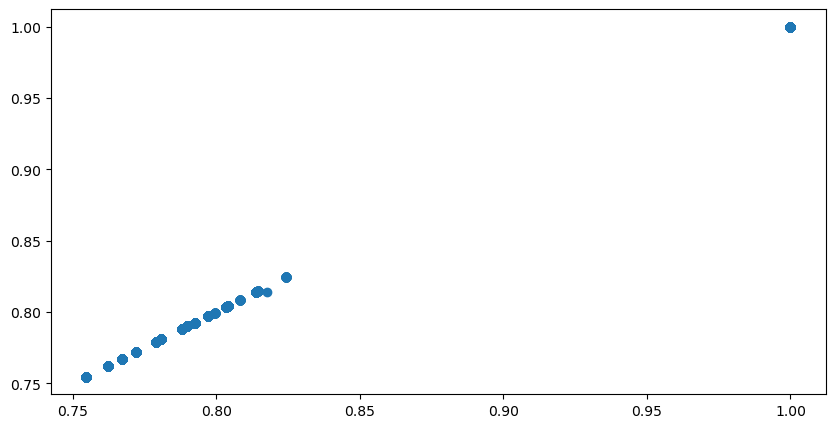

In [94]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, tree_model.predict(X_test))



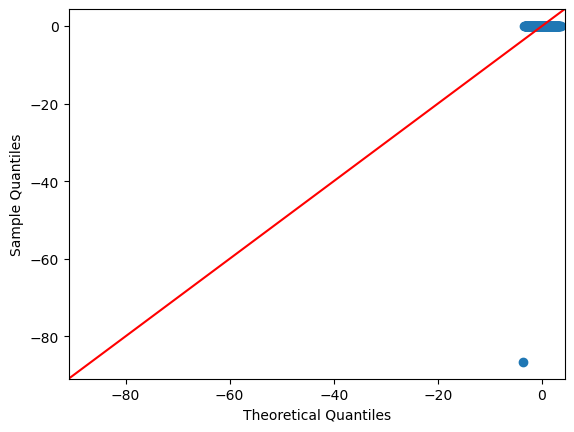

In [95]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## Creating Random forest model

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)



In [97]:
# Calculate R2 score and Adjusted R2 score for training dataset
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p_train - 1)

# Calculate R2 score and Adjusted R2 score for test dataset
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - p_test - 1)

In [98]:
# Calculate mean squared error (MSE) for training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for training and test datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute percentage error (MAPE) for training and test datasets
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100



In [99]:
# Print the model metrics and scores
print("Model Metrics:")
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)
print("MSE (Train):", mse_train)
print("RMSE (Train):", rmse_train)
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("Train Score:", rf_model.score(X_train, y_train))
print("Test Score:", rf_model.score(X_test, y_test))

Model Metrics:
R2 Score (Train): 0.9999999999990216
Adjusted R2 Score (Train): 0.9999999999990206
R2 Score (Test): 0.999999164403017
Adjusted R2 Score (Test): 0.9999991625044405
MSE (Train): 1.9378432234114236e-15
RMSE (Train): 4.402094073746521e-08
MSE (Test): 1.6079801724836307e-09
RMSE (Test): 4.00996280841061e-05
MAPE (Train): 4.045425197906077e-06
MAPE (Test): 6.242895890862345e-05
Train Score: 0.9999999999990216
Test Score: 0.999999164403017


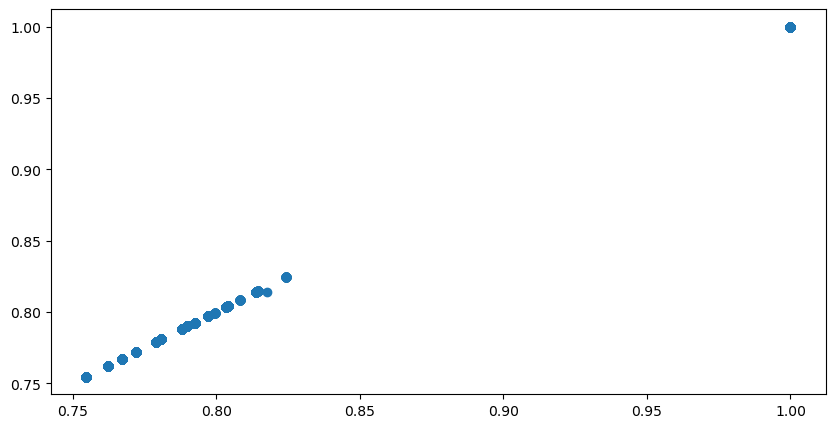

In [100]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, rf_model.predict(X_test))

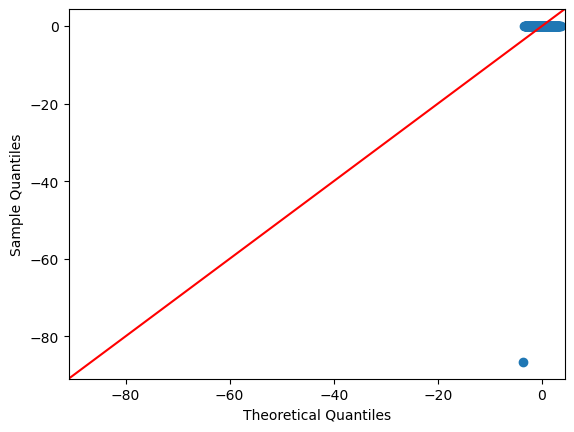

In [101]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## Support Vector Machine

In [102]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create an SVM Regressor model
svm_model = SVR()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate R2 score for training and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean squared error (MSE) for training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for training and test datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute percentage error (MAPE) for training and test datasets
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the model metrics and scores
print("SVM Regressor Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)
print("MSE (Train):", mse_train)
print("RMSE (Train):", rmse_train)
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("Train Score:", svm_model.score(X_train, y_train))
print("Test Score:", svm_model.score(X_test, y_test))


SVM Regressor Metrics:
R2 Score (Train): 0.17668695019336478
R2 Score (Test): 0.14382452327553585
MSE (Train): 0.0016306021450799076
RMSE (Train): 0.040380715014470804
MSE (Test): 0.0016475803750142196
RMSE (Test): 0.040590397571522004
MAPE (Train): 3.9857411721958176
MAPE (Test): 4.023291812301816
Train Score: 0.17668695019336478
Test Score: 0.14382452327553585


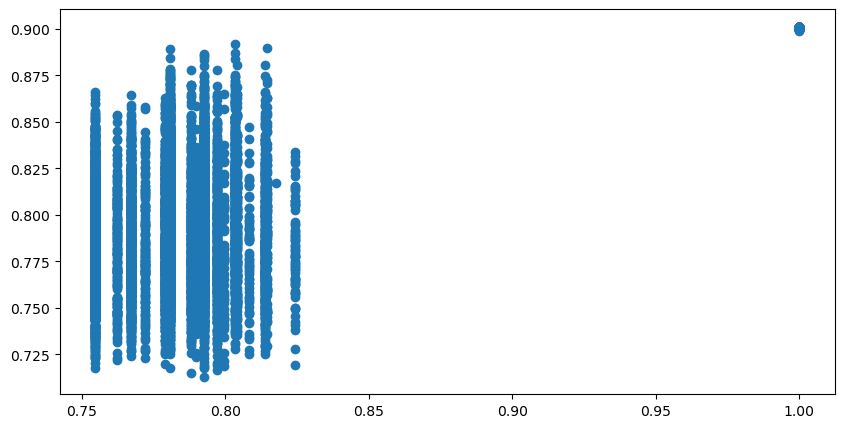

In [103]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, svm_model.predict(X_test))

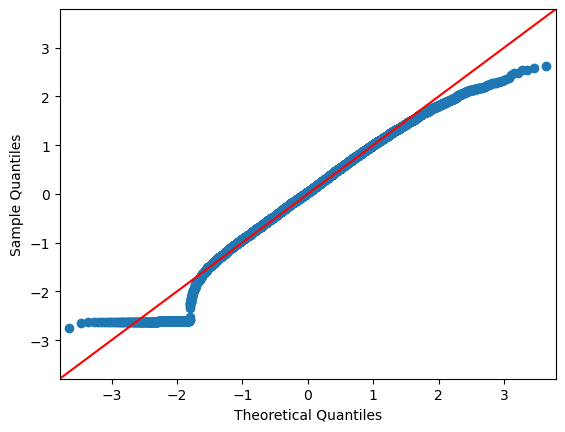

In [104]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## KNN reighbors

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a KNN Regressor model
knn_model = KNeighborsRegressor()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate R2 score for training and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean squared error (MSE) for training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for training and test datasets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute percentage error (MAPE) for training and test datasets
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the model metrics and scores
print("KNN Regressor Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)
print("MSE (Train):", mse_train)
print("RMSE (Train):", rmse_train)
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("Train Score:", knn_model.score(X_train, y_train))
print("Test Score:", knn_model.score(X_test, y_test))


KNN Regressor Metrics:
R2 Score (Train): 0.845380970757328
R2 Score (Test): 0.7401109195829985
MSE (Train): 0.00030622874350465815
RMSE (Train): 0.017499392661022788
MSE (Test): 0.0005001172776096042
RMSE (Test): 0.02236330202831425
MAPE (Train): 1.4985338804967459
MAPE (Test): 1.8867092578856115
Train Score: 0.845380970757328
Test Score: 0.7401109195829985


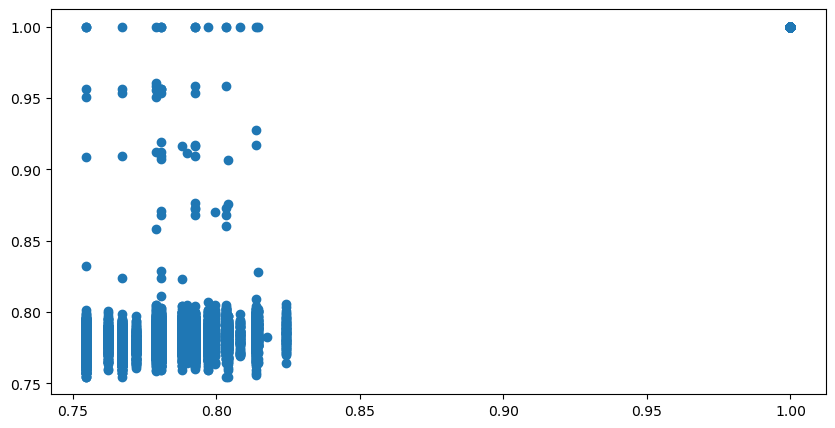

In [106]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, knn_model.predict(X_test))

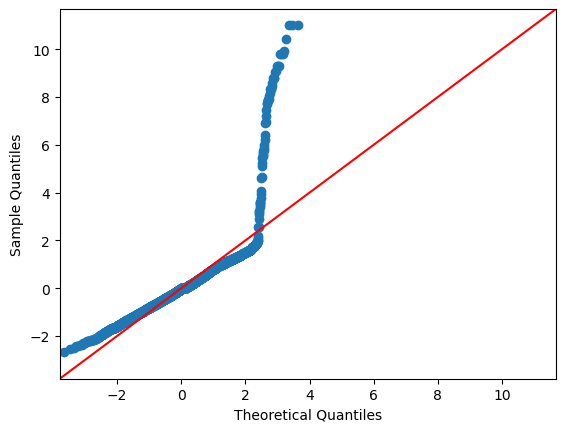

In [107]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

# Model Tuning Methods:
### 1. Grid Search



In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [50, 100],
    'n_estimators': [100,50]
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(x, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100}
Best Score: 0.9997771636850469


In [109]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor with the tuned parameters
rf_model = RandomForestRegressor(max_depth=7, max_features=8, min_samples_leaf=5, min_samples_split=50, n_estimators=50)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate the model metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the model metrics
print("Random Forest Model Metrics:")
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)
print("MSE (Train):", mse_train)
print("RMSE (Train):", rmse_train)
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("Train Score:", rf_model.score(X_train, y_train))
print("Test Score:", rf_model.score(X_test, y_test))


Random Forest Model Metrics:
R2 Score (Train): 0.9997673837942151
R2 Score (Test): 0.9997578970778151
MSE (Train): 4.6070505529118447e-07
RMSE (Train): 0.0006787525729536385
MSE (Test): 4.658905027874024e-07
RMSE (Test): 0.0006825617208629578
MAPE (Train): 0.05888759640625341
MAPE (Test): 0.05926151317787093
Train Score: 0.9997673837942151
Test Score: 0.9997578970778151


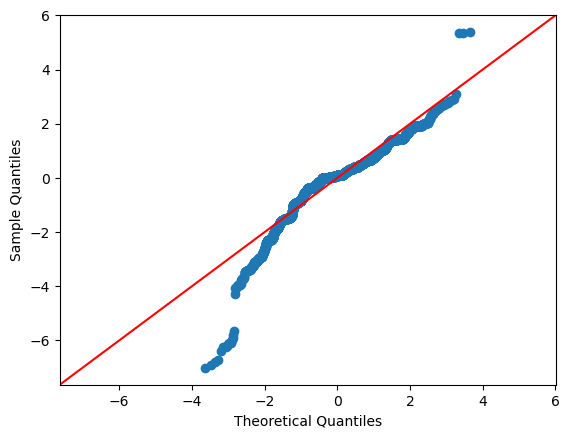

In [110]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## K FOLD VALIDATION IN LINEAR REGRESSION

### 2. Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:



# Perform cross-validation with 5 folds
cv_scores = cross_val_score(reg_model, x, y, cv=5, scoring='r2')

# Print the average R2 score across all folds
print("Average R2 score:", np.mean(cv_scores))


Average R2 score: 0.9695444564344722


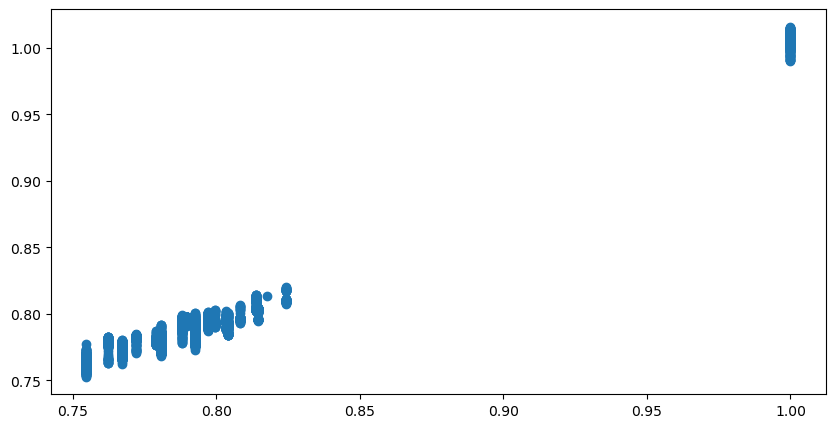

In [113]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, reg_model.predict(X_test))

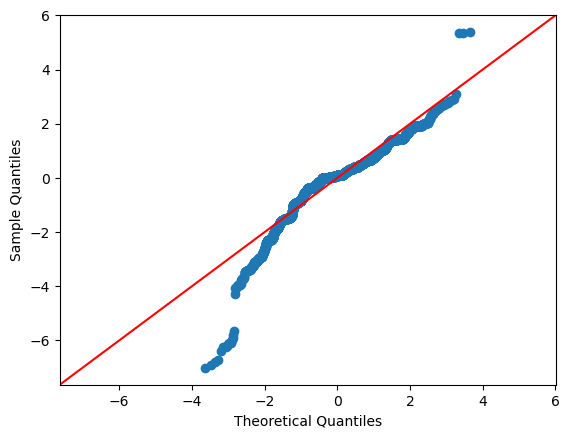

In [114]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

# K FOLD VALIDATION IN RANDOM FOREST

In [115]:

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring='r2')

# Print the average R2 score across all folds
print("Average R2 score:", np.mean(cv_scores))


Average R2 score: 0.9997676289661455


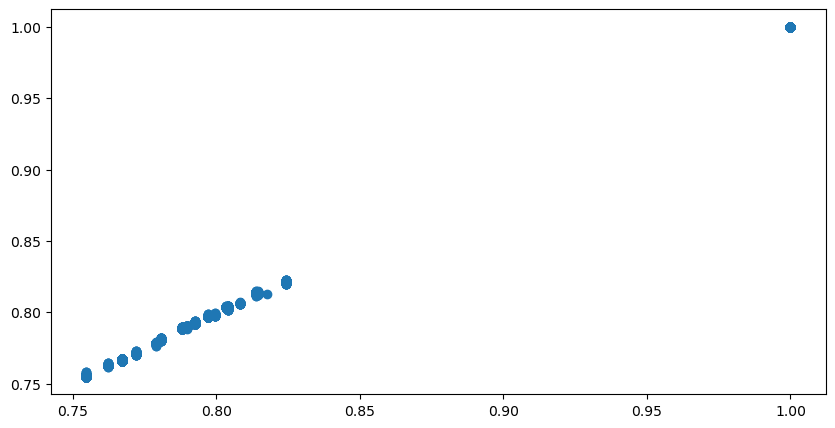

In [116]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, rf_model.predict(X_test))

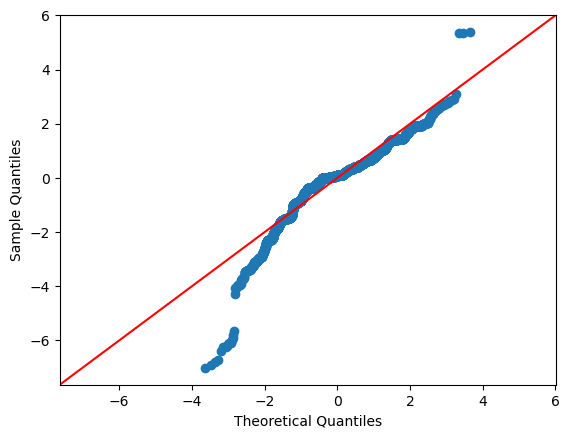

In [117]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

## K FOLD VALIDATION IN DECESION TREE

In [118]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(tree_model, x, y, cv=5, scoring='r2')

# Print the average R2 score across all folds
print("Average R2 score:", np.mean(cv_scores))

Average R2 score: 0.9999996734362503


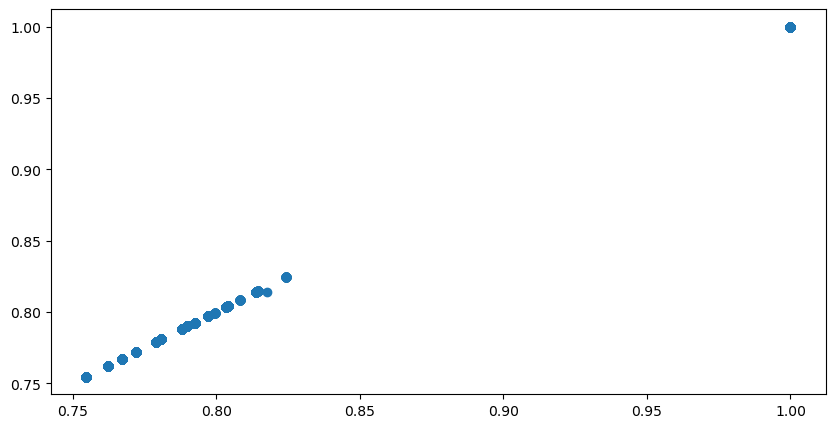

In [119]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, tree_model.predict(X_test))

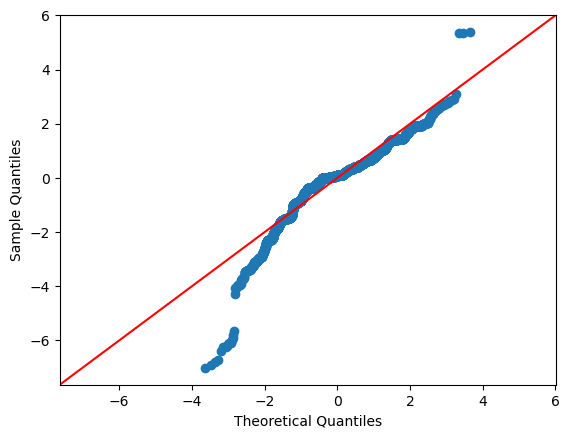

In [120]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

# K FOLD VALIDATION IN SVM TREE

In [121]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svm_model, x, y, cv=5, scoring='r2')

# Print the average R2 score across all folds
print("Average R2 score:", np.mean(cv_scores))

Average R2 score: 0.18843076488277627


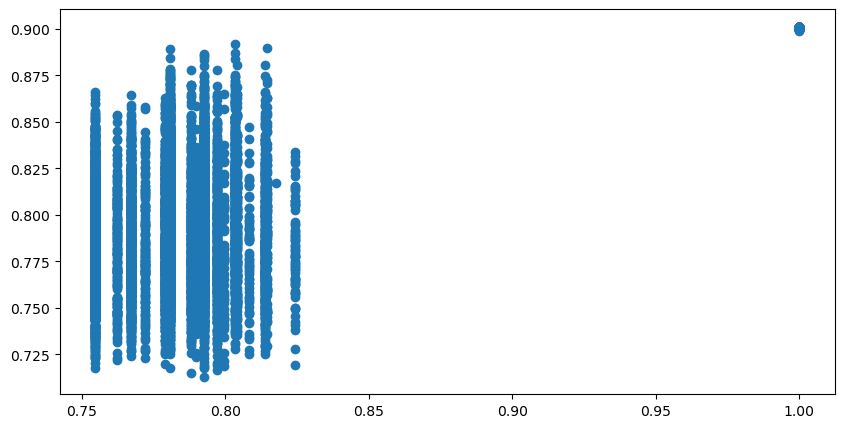

In [123]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, svm_model.predict(X_test))

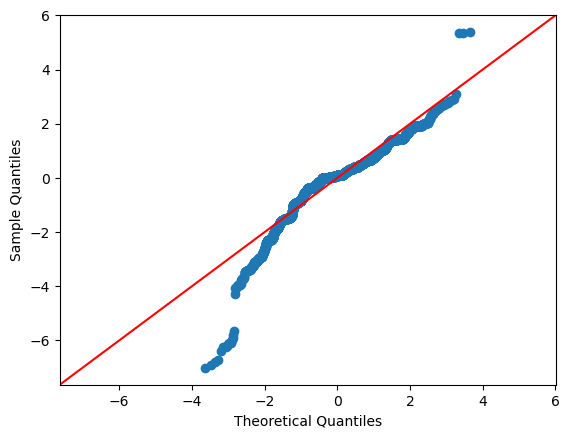

In [124]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

# K FOLD VALIDATION IN KNN TREE

In [125]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(knn_model, x, y, cv=5, scoring='r2')

# Print the average R2 score across all folds
print("Average R2 score:", np.mean(cv_scores))

Average R2 score: 0.760252847379079


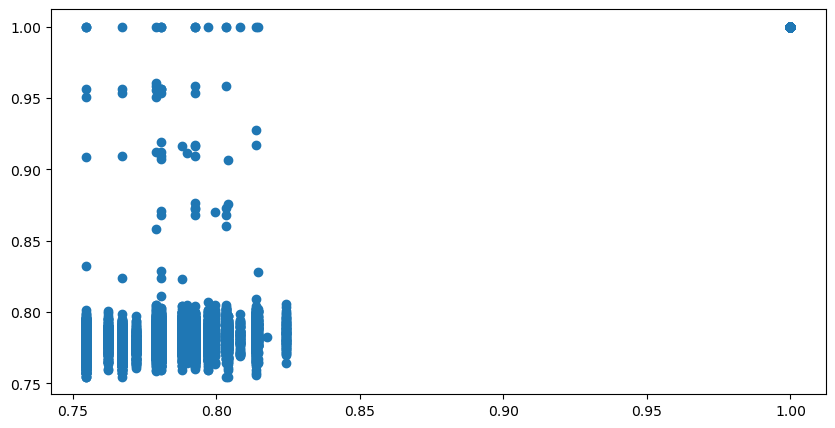

In [126]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, knn_model.predict(X_test))

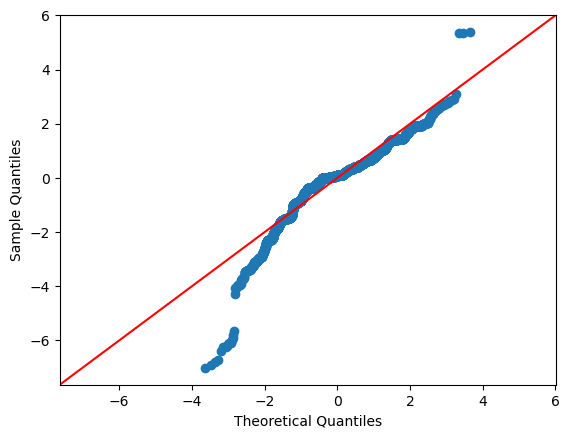

In [127]:
Residual = y_test_pred-y_test

# res = LR_stats.resid
fig = sm.qqplot(Residual,fit=True,line='45')
plt.show()

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest with Cross-validation
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_cv_scores = cross_val_score(random_forest_model, x, y, cv=5, scoring='r2')
average_rf_r2 = rf_cv_scores.mean()
print("Average R-squared score for Random Forest with Cross-validation:", average_rf_r2)

# Decision Tree with Cross-validation
decision_tree_model = DecisionTreeRegressor(max_depth=None, random_state=42)
dt_cv_scores = cross_val_score(decision_tree_model, x, y, cv=5, scoring='r2')
average_dt_r2 = dt_cv_scores.mean()
print("Average R-squared score for Decision Tree with Cross-validation:", average_dt_r2)


Average R-squared score for Random Forest with Cross-validation: 0.9999997443954388
Average R-squared score for Decision Tree with Cross-validation: 0.9999996734370391


In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assuming you have the features (X) and target variable (y) from the HR data

# Decision Tree with limited max_depth
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_cv_scores = cross_val_score(decision_tree_model, x, y, cv=5, scoring='r2')
average_dt_r2 = dt_cv_scores.mean()
print("Average R-squared score for Decision Tree with limited max_depth:", average_dt_r2)


Average R-squared score for Decision Tree with limited max_depth: 0.9999711436434995


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming you have the features (X) and target variable (y) from the HR data

# Random Forest with limited max_features
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, max_features=0.5, random_state=42)
rf_cv_scores = cross_val_score(random_forest_model, x, y, cv=5, scoring='r2')
average_rf_r2 = rf_cv_scores.mean()
print("Average R-squared score for Random Forest with limited max_features:", average_rf_r2)


Average R-squared score for Random Forest with limited max_features: 0.9999970030614251


### Top Five features

In [132]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is the target variable
# Replace 'X' and 'y' with your actual feature matrix and target variable
# For example: X = df.drop('Salary', axis=1), y = df['Salary']
 
# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(x, y)

# Get the feature importances
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top n features with highest importance
n = 5  # You can change 'n' to get more or fewer top features
print(feature_importance_df.head(n))


                   Feature    Importance
10             Current_CTC  4.267675e-01
13  No_Of_Companies_worked  3.119608e-01
0         Total_Experience  2.612458e-01
7                Education  2.532068e-05
11            Inhand_Offer  5.744707e-07
